# DATA SCIENCE 

# Analytical Report

# NLP With Hotel Review Part 1

### Written by Nataliya Parshyna

### Date: March 6, 2021

##  I. Exploratory Data Analysis

### 1. The target column of interest is Reviewer_Score.
    

In [1]:
# Importing  relevant packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

 #### 1.1.  What is the shape of the dataset?

In [2]:
# Importing data set.

df_hotels=pd.read_csv("Hotel_Reviews.csv",encoding='latin-1')

In [3]:
df_hotels.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

In [4]:
#checking general information
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [5]:
# checking data frame shape - number of rows and columns
df_hotels.shape

(515738, 17)

In [6]:
# Checking if there are any null values

df_hotels.isna().sum()/df_hotels.shape[0]*100

Hotel_Address                                 0.000000
Additional_Number_of_Scoring                  0.000000
Review_Date                                   0.000000
Average_Score                                 0.000000
Hotel_Name                                    0.000000
Reviewer_Nationality                          0.000000
Negative_Review                               0.000000
Review_Total_Negative_Word_Counts             0.000000
Total_Number_of_Reviews                       0.000000
Positive_Review                               0.000000
Review_Total_Positive_Word_Counts             0.000000
Total_Number_of_Reviews_Reviewer_Has_Given    0.000000
Reviewer_Score                                0.000000
Tags                                          0.000000
days_since_review                             0.000000
lat                                           0.633655
lng                                           0.633655
dtype: float64

#### The shape of the dataset is (515738, 17): 515738 rows and 17 columns.
* Note: there are some null values in this data set. I will go ahead and drop rows with null values.

In [7]:
# dropping rows with null numbers
df_hotels = df_hotels.dropna()

In [8]:
#checking for null numbers again
df_hotels.isna().sum()/df_hotels.shape[0]*100

Hotel_Address                                 0.0
Additional_Number_of_Scoring                  0.0
Review_Date                                   0.0
Average_Score                                 0.0
Hotel_Name                                    0.0
Reviewer_Nationality                          0.0
Negative_Review                               0.0
Review_Total_Negative_Word_Counts             0.0
Total_Number_of_Reviews                       0.0
Positive_Review                               0.0
Review_Total_Positive_Word_Counts             0.0
Total_Number_of_Reviews_Reviewer_Has_Given    0.0
Reviewer_Score                                0.0
Tags                                          0.0
days_since_review                             0.0
lat                                           0.0
lng                                           0.0
dtype: float64

Now we have a clean data set with no null numbers.

In [9]:
#checking a shape again
df_hotels.shape

(512470, 17)

#### Now the shape of the dataset is (512470, 17): 512470 rows and 17 columns.

#### 1.2. The reviews provided are all given as decimal values. Convert them into integers from 1 to 10

In [10]:
df_hotels['Reviewer_Score'] = df_hotels['Reviewer_Score'].round(1).astype(int)

In [11]:
df_hotels.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7               2   
1                                           7               7   
2                                           9               7   
3                                           1               3   
4                                           3               6   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

In [12]:
df_hotels['Reviewer_Score'].dtype

dtype('int32')

In [13]:
df_hotels['Reviewer_Score'].value_counts()

9     130416
10    115243
7      92597
8      87905
6      34133
5      30032
4      11473
3       6904
2       3767
Name: Reviewer_Score, dtype: int64

We have converted the reviews to integers from 1 to 10.

 ####  1.3. The reviews are scored from 1 to 10. What do you expect the distribution of scores to look like? 
 ####   What is the actual distribution of reviews?

In [14]:
# getting general information about data table using the Transpose feature
df_hotels.describe().T

count         mean  \
Additional_Number_of_Scoring                512470.0   500.118391   
Average_Score                               512470.0     8.397934   
Review_Total_Negative_Word_Counts           512470.0    18.541864   
Total_Number_of_Reviews                     512470.0  2747.504902   
Review_Total_Positive_Word_Counts           512470.0    17.765052   
Total_Number_of_Reviews_Reviewer_Has_Given  512470.0     7.152272   
Reviewer_Score                              512470.0     8.013521   
lat                                         512470.0    49.442439   
lng                                         512470.0     2.823803   

                                                    std        min  \
Additional_Number_of_Scoring                 501.419262   1.000000   
Average_Score                                  0.549133   5.200000   
Review_Total_Negative_Word_Counts             29.693695   0.000000   
Total_Number_of_Reviews                     2322.698454  43.000000   
Review_Total_Positive_Word_Counts             21.789025   0.000000   
Total_Number_of_Reviews_Reviewer_Has_Given    11.028943   1.000000   
Reviewer_Score                                 1.757263   2.000000   
lat                                            3.466325  41.328376   
lng                                            4.579425  -0.369758   

                                                    25%          50%  \
Additional_Number_of_Scoring                 169.000000   343.000000   
Average_Score                                  8.100000     8.400000   
Review_Total_Negative_Word_Counts              2.000000     9.000000   
Total_Number_of_Reviews                     1161.000000  2134.000000   
Review_Total_Positive_Word_Counts              5.000000    11.000000   
Total_Number_of_Reviews_Reviewer_Has_Given     1.000000     3.000000   
Reviewer_Score                                 7.000000     8.000000   
lat                                           48.214662    51.499981   
lng                                           -0.143372     0.010607   

                                                    75%           max  
Additional_Number_of_Scoring                 666.000000   2682.000000  
Average_Score                                  8.800000      9.800000  
Review_Total_Negative_Word_Counts             23.000000    408.000000  
Total_Number_of_Reviews                     3633.000000  16670.000000  
Review_Total_Positive_Word_Counts             22.000000    395.000000  
Total_Number_of_Reviews_Reviewer_Has_Given     8.000000    355.000000  
Reviewer_Score                                 9.000000     10.000000  
lat                                           51.516288     52.400181  
lng                                            4.834443     16.429233

Since we have scores from 1 to 10, I would expect that scores are distributed in the way that the maximum distribution of scores is around 5, i.e scores are distributed normally.
However, we can see that the mean for review scores is approximately 8.01. A histogram below shows the distribution of scores.
Most reviewers score their hotels with a score of 9 (pretty great reviews!)

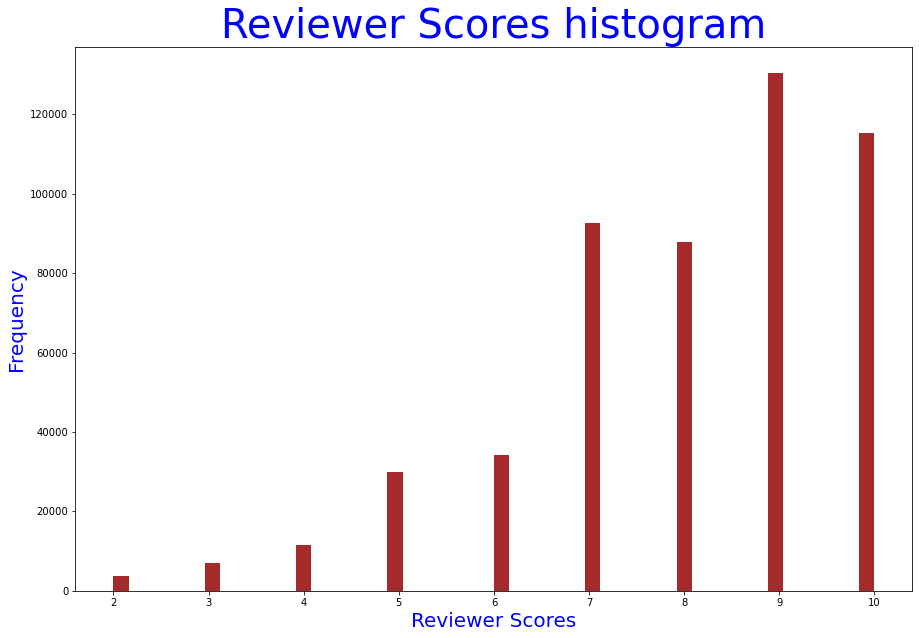

In [15]:
plt.figure(figsize=(15, 10))
plt.hist(df_hotels['Reviewer_Score'], bins=50, color='brown')
plt.xlabel('Reviewer Scores', color='b', size=20)
plt.ylabel('Frequency',color='b', size=20 )
plt.title('Reviewer Scores histogram', color='b', size=40)
plt.show()

#### 1.4. Given this will be a classification problem, what is a potential problem with this distribution?

 A classification problem involves predicting a class for a given observation. The assumption here is the samples are balanced. We have an imbalanced set of scores, and this might cause a potential problem in our predicting model. It is much easier to predict the scores of higher numbers, and very difficult to predict scores of lower numbers. We have a biased set of scores highly skewed towards higher scores. The model might have a very poor predictive performance, specifically for the lower scores. With imbalanced classes we will have a problem calculating the accuracy of the model where accuracy can be written as:

𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦=𝑇𝑁+𝑇𝑃𝑇𝑁+𝐹𝑃+𝐹𝑁+𝑇𝑃Accuracy=TN+TPTN+FP+FN+TP
. So we will have to choose a different metric, not the accuracy metric, to evaluate the performance of our model. We can choose a precision metric, a recall metric, the 𝐹1 score, or the AUC metric for the model performance evaluation. A potential problem would be in splitting the data for training and testing. We might not have enough data with a score of 4 and less to be trained on. As a result, the model for test data won't perform well. We have to make sure we are sampling the data evenly between different scores. Also, if we are looking mostly to predict negative reviews, our model won't give a good prediction as it was not trained well on negative predictions.

### 2. This dataset has a good mix of numeric and non-numeric columns. Which columns are numeric? Which are non-numeric? Can you turn some of the non-numeric columns to numeric?

In [16]:
# Setting new data frames as numeric and non-numeric data types
df_numerical   = df_hotels.select_dtypes(include = [np.number]).columns
df_categorical = df_hotels.select_dtypes(include= [np.object]).columns

In [17]:
#checking numeric data types
df_numerical

Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'lat',
       'lng'],
      dtype='object')

In [18]:
#checking non-numeric data types
df_categorical

Index(['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Positive_Review', 'Tags', 'days_since_review'],
      dtype='object')

In [19]:
#checking data types again
df_hotels.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                  int32
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

There are 17 columns in this data set:


1. Hotel_Address                                 - non-numeric 
2. Additional_Number_of_Scoring                  - numeric  
3. Review_Date                                   - non-numeric 
4. Average_Score                                 - numeric
5. Hotel_Name                                    - non-numerict 
6. Reviewer_Nationality                          - non-numerict 
7. Negative_Review                               - non-numeric 
8. Review_Total_Negative_Word_Counts             - numeric  
9. Total_Number_of_Reviews                       - numeric  
10. Positive_Review                              - non-numeric 
11. Review_Total_Positive_Word_Counts            - numeric  
12. Total_Number_of_Reviews_Reviewer_Has_Given   - numeric  
13. Reviewer_Score                               - numeric 
14. Tags                                         - non-numeric 
15. days_since_review                            - non-numeric 
16. lat                                          - numeric
17. lng                                          - numeric


There are 9 numeric columns and 8 non-numeric columns.

Non-numeric columns are :

 - Hotel_Address
 - Review_Date
 - Hotel_Name
 - Reviewer_Nationality
 - Negative_Review
 - Positive_Review
 - Tags
 - days_since_review

### I can change some non-numerical columns to numerical. The columns I can change are:

    - Hotel_Address
    - Review_Date
    - Hotel_Name
    - Reviewer_Nationality
    - days_since_review

    Columns 'Hotel_Address', 'Hotel_Name', and 'Reviewer_Nationality' contain not ranked data, so I will use an OneHotEncoder method to change values to numeric.
    A column 'Review_Date' is ranked. It looks like we have 3 distinctive years in the 'Review_Date' column: 2015, 2016, and 2017 years. I will use a Label Encoding method to label these years:
 - 2015 year as 1
 - 2016 year as 2
 - 2017 year as 3
 
     A column 'days_since_review' is a string column. I will convert it to an integer type by removing the word 'days' in it.

#### We will perform some visualization for a better understanding of the data.

In [114]:
import seaborn as sns

Which are the top hotel chains?

Text(0.5, 0, 'Number of outlets')

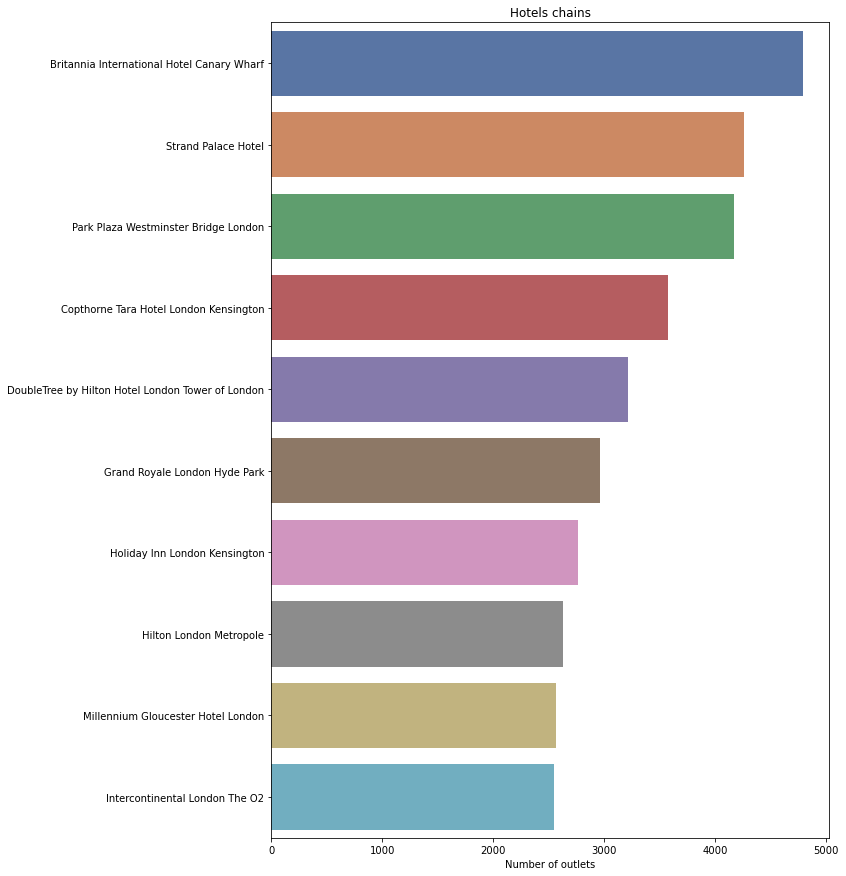

In [137]:
plt.figure(figsize=(10,15))
chains=df_hotels['Hotel_Name'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Hotels chains")
plt.xlabel("Number of outlets")

We can see that a chain with the most number of hotels is Brittania International Hotel Canoy Wharf.

Using Tableau software, we can see from 'Hotels' locations on the map' graph that all reviewed hotels are located in Europe.
Using Tableau software, we can see from 'Hotels' locations on the map' graph that all reviewed hotels are located in Europe.
From the 'Reviewer Scores by Reviewer Nationality ' graph, we see that the most reviews are from the United Kingdom and the United States of America citizens.
From the 'Days Since Positive Reviews', we can see that most reviews, positive and negative, are given within the first day, presumably, after leaving the hotel.
From the 'Reviews by Review Date,' we can see that the most reviews were given in the 2016 year.
From 'Number of Reviews by Hotels' we can see that the hotel Bloomsburg Palace Hotel has received the most reviews.

Note: for all Tableau graph please refer to a separate file 'NLP With Hotel Review' included in this submission.

## II. Data Wrangling

#### 3. Build the proper dataset separation (Optional but recommended: The dataset is actually too big to run quickly on most laptops. Feel free to sample ~10% of the data as your dataset from this point on. Make sure all classes are included in your subsample.)

In [20]:
#define total sample size desired

N = 51247                 # 10 % of the total rows count(512470x0.1)


In [21]:
# get sample size making sure we get an even distribution of scores in our target variable - 'Reviewer_Score'
# N*len(x)/len(df_hotels) where N = 51247

df_hotels_samp = df_hotels.groupby('Reviewer_Score', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df_hotels))))).sample(frac=1).reset_index(drop=True)


In [22]:
#checking first 5 values of  a sampled data set
df_hotels_samp.head()

Hotel_Address  \
0  King William Walk Greenwich London SE10 9JW Un...   
1  57 59 Welbeck Street Westminster Borough Londo...   
2  Via Albricci 2 4 Milan City Center 20122 Milan...   
3         Rossell 249 Eixample 08008 Barcelona Spain   
4  Mallorca 1 23 Sants Montju c 08014 Barcelona S...   

   Additional_Number_of_Scoring Review_Date  Average_Score  \
0                           484   6/27/2017            8.2   
1                           241   1/23/2016            7.5   
2                           493    5/2/2017            9.0   
3                           115   8/11/2016            9.1   
4                           390   4/11/2016            7.6   

                         Hotel_Name Reviewer_Nationality  \
0           De Vere Devonport House      United Kingdom    
1  Holiday Inn London Oxford Circus             Romania    
2           The Square Milano Duomo           Sri Lanka    
3                     Gallery Hotel              France    
4              Expo Hotel Barcelona             Ireland    

                                     Negative_Review  \
0    The Bathroom needs serious overhaul and update    
1               The elevator in the morning to busy    
2   The breakfast menu should change cos when you...   
3                 Wifi could be a lot better was 4MB   
4                                        No Negative   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  9                     1827   
1                                  9                     1287   
2                                 20                     4192   
3                                  9                      953   
4                                  0                     4646   

                                     Positive_Review  \
0   Beds where really comfy and enjoyed a good ni...   
1                  The hospitality of the personnel    
2             Location staff was very friendly clean   
3                      Roof BAR bedroom taxis at 50M   
4   LOCATED PERFECTLY FOR THE TRAIN FROM TO THE A...   

   Review_Total_Positive_Word_Counts  \
0                                 77   
1                                  7   
2                                  7   
3                                  7   
4                                 27   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           1               7   
1                                           1              10   
2                                           1               9   
3                                           1               7   
4                                           6               9   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Twin Room ', ...           37 days   
1  [' Leisure trip ', ' Family with young childre...           558 day   
2  [' Leisure trip ', ' Couple ', ' Deluxe Double...           93 days   
3  [' Leisure trip ', ' Couple ', ' Standard Doub...           357 day   
4  [' Leisure trip ', ' Solo traveler ', ' Superi...           479 day   

         lat       lng  
0  51.480672 -0.007137  
1  51.516843 -0.149557  
2  45.460860  9.189021  
3  41.394924  2.159310  
4  41.379205  2.142799

I will check the classes distribution in the 'Reviewer_Score' column.

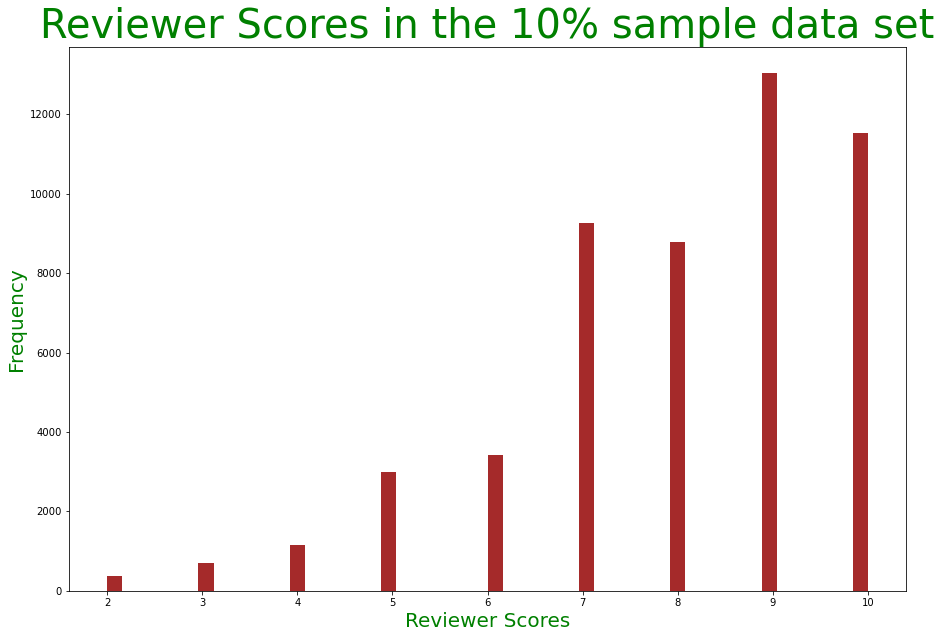

In [23]:
plt.figure(figsize=(15, 10))
plt.hist(df_hotels_samp['Reviewer_Score'], bins=50, color='brown')
plt.xlabel('Reviewer Scores', color='g', size=20)
plt.ylabel('Frequency',color='g', size=20 )
plt.title('Reviewer Scores in the 10% sample data set', color='g', size=40)
plt.show()

The distribution of scores is the same as in the original data set 'df_hotels'.

#### 3.1. Convert the Reviewer_Score column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').

In [24]:
# encoding reviews: (1-8)=0, (9-10)=1
Reviewer_score = []

for row in df_hotels_samp['Reviewer_Score']:
    if row<9:
        Reviewer_score.append('0')
    else:
        Reviewer_score.append('1')

In [25]:
df_hotels_samp['Reviewer_Score'] = Reviewer_score

In [26]:
df_hotels_samp['Reviewer_Score'] = df_hotels_samp.Reviewer_Score.astype(int)

In [27]:
df_hotels_samp.head()

Hotel_Address  \
0  King William Walk Greenwich London SE10 9JW Un...   
1  57 59 Welbeck Street Westminster Borough Londo...   
2  Via Albricci 2 4 Milan City Center 20122 Milan...   
3         Rossell 249 Eixample 08008 Barcelona Spain   
4  Mallorca 1 23 Sants Montju c 08014 Barcelona S...   

   Additional_Number_of_Scoring Review_Date  Average_Score  \
0                           484   6/27/2017            8.2   
1                           241   1/23/2016            7.5   
2                           493    5/2/2017            9.0   
3                           115   8/11/2016            9.1   
4                           390   4/11/2016            7.6   

                         Hotel_Name Reviewer_Nationality  \
0           De Vere Devonport House      United Kingdom    
1  Holiday Inn London Oxford Circus             Romania    
2           The Square Milano Duomo           Sri Lanka    
3                     Gallery Hotel              France    
4              Expo Hotel Barcelona             Ireland    

                                     Negative_Review  \
0    The Bathroom needs serious overhaul and update    
1               The elevator in the morning to busy    
2   The breakfast menu should change cos when you...   
3                 Wifi could be a lot better was 4MB   
4                                        No Negative   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  9                     1827   
1                                  9                     1287   
2                                 20                     4192   
3                                  9                      953   
4                                  0                     4646   

                                     Positive_Review  \
0   Beds where really comfy and enjoyed a good ni...   
1                  The hospitality of the personnel    
2             Location staff was very friendly clean   
3                      Roof BAR bedroom taxis at 50M   
4   LOCATED PERFECTLY FOR THE TRAIN FROM TO THE A...   

   Review_Total_Positive_Word_Counts  \
0                                 77   
1                                  7   
2                                  7   
3                                  7   
4                                 27   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           1               0   
1                                           1               1   
2                                           1               1   
3                                           1               0   
4                                           6               1   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Twin Room ', ...           37 days   
1  [' Leisure trip ', ' Family with young childre...           558 day   
2  [' Leisure trip ', ' Couple ', ' Deluxe Double...           93 days   
3  [' Leisure trip ', ' Couple ', ' Standard Doub...           357 day   
4  [' Leisure trip ', ' Solo traveler ', ' Superi...           479 day   

         lat       lng  
0  51.480672 -0.007137  
1  51.516843 -0.149557  
2  45.460860  9.189021  
3  41.394924  2.159310  
4  41.379205  2.142799

We successfully changed the Reviewer_Score column into a binary column.

#### 3. 2. Convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except Positive_Review and Negative_Review.

- A column 'Review_Date' is ranked. It looks like we have 3 distinctive years in the 'Review_Date' column: 2015, 2016, and  2017 years. I will use a Label Encoding method to label these years:
     - 2015 year as 1
     - 2016 year as 2
     - 2017 year as 3
 
- A column 'days_since_review' is a string column. I will convert it to an integer type by removing the word 'days' in it.

- Columns 'Hotel_Address', 'Hotel_Name', and 'Reviewer_Nationality' contain not ranked data, so I will use an OneHotEncoder method to change values to numeric.

##### Changing 'Review_Date' column

In [28]:
# checking data types again. Its an object data type.
df_hotels_samp['Review_Date'].dtypes

dtype('O')

I will convert the data type in this column from an object type to a datetime type.

In [29]:
df_hotels_samp['Review_Date']= pd.to_datetime(df_hotels_samp['Review_Date'])

In [30]:
# checking if converted to a datetime type.
df_hotels_samp['Review_Date'].dtypes

dtype('<M8[ns]')

In [31]:
# checking data in Review_Date column, now it is in datetime format

df_hotels_samp.head()

Hotel_Address  \
0  King William Walk Greenwich London SE10 9JW Un...   
1  57 59 Welbeck Street Westminster Borough Londo...   
2  Via Albricci 2 4 Milan City Center 20122 Milan...   
3         Rossell 249 Eixample 08008 Barcelona Spain   
4  Mallorca 1 23 Sants Montju c 08014 Barcelona S...   

   Additional_Number_of_Scoring Review_Date  Average_Score  \
0                           484  2017-06-27            8.2   
1                           241  2016-01-23            7.5   
2                           493  2017-05-02            9.0   
3                           115  2016-08-11            9.1   
4                           390  2016-04-11            7.6   

                         Hotel_Name Reviewer_Nationality  \
0           De Vere Devonport House      United Kingdom    
1  Holiday Inn London Oxford Circus             Romania    
2           The Square Milano Duomo           Sri Lanka    
3                     Gallery Hotel              France    
4              Expo Hotel Barcelona             Ireland    

                                     Negative_Review  \
0    The Bathroom needs serious overhaul and update    
1               The elevator in the morning to busy    
2   The breakfast menu should change cos when you...   
3                 Wifi could be a lot better was 4MB   
4                                        No Negative   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  9                     1827   
1                                  9                     1287   
2                                 20                     4192   
3                                  9                      953   
4                                  0                     4646   

                                     Positive_Review  \
0   Beds where really comfy and enjoyed a good ni...   
1                  The hospitality of the personnel    
2             Location staff was very friendly clean   
3                      Roof BAR bedroom taxis at 50M   
4   LOCATED PERFECTLY FOR THE TRAIN FROM TO THE A...   

   Review_Total_Positive_Word_Counts  \
0                                 77   
1                                  7   
2                                  7   
3                                  7   
4                                 27   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           1               0   
1                                           1               1   
2                                           1               1   
3                                           1               0   
4                                           6               1   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Twin Room ', ...           37 days   
1  [' Leisure trip ', ' Family with young childre...           558 day   
2  [' Leisure trip ', ' Couple ', ' Deluxe Double...           93 days   
3  [' Leisure trip ', ' Couple ', ' Standard Doub...           357 day   
4  [' Leisure trip ', ' Solo traveler ', ' Superi...           479 day   

         lat       lng  
0  51.480672 -0.007137  
1  51.516843 -0.149557  
2  45.460860  9.189021  
3  41.394924  2.159310  
4  41.379205  2.142799

In [32]:
# converting data in 'Review_Date' column in a way, we have only year

df_hotels_samp['Review_Date'] = pd.DatetimeIndex(df_hotels_samp['Review_Date']).year

In [33]:
#checking if 'Review_Date' column has only year now
df_hotels_samp.head()

Hotel_Address  \
0  King William Walk Greenwich London SE10 9JW Un...   
1  57 59 Welbeck Street Westminster Borough Londo...   
2  Via Albricci 2 4 Milan City Center 20122 Milan...   
3         Rossell 249 Eixample 08008 Barcelona Spain   
4  Mallorca 1 23 Sants Montju c 08014 Barcelona S...   

   Additional_Number_of_Scoring  Review_Date  Average_Score  \
0                           484         2017            8.2   
1                           241         2016            7.5   
2                           493         2017            9.0   
3                           115         2016            9.1   
4                           390         2016            7.6   

                         Hotel_Name Reviewer_Nationality  \
0           De Vere Devonport House      United Kingdom    
1  Holiday Inn London Oxford Circus             Romania    
2           The Square Milano Duomo           Sri Lanka    
3                     Gallery Hotel              France    
4              Expo Hotel Barcelona             Ireland    

                                     Negative_Review  \
0    The Bathroom needs serious overhaul and update    
1               The elevator in the morning to busy    
2   The breakfast menu should change cos when you...   
3                 Wifi could be a lot better was 4MB   
4                                        No Negative   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  9                     1827   
1                                  9                     1287   
2                                 20                     4192   
3                                  9                      953   
4                                  0                     4646   

                                     Positive_Review  \
0   Beds where really comfy and enjoyed a good ni...   
1                  The hospitality of the personnel    
2             Location staff was very friendly clean   
3                      Roof BAR bedroom taxis at 50M   
4   LOCATED PERFECTLY FOR THE TRAIN FROM TO THE A...   

   Review_Total_Positive_Word_Counts  \
0                                 77   
1                                  7   
2                                  7   
3                                  7   
4                                 27   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           1               0   
1                                           1               1   
2                                           1               1   
3                                           1               0   
4                                           6               1   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Twin Room ', ...           37 days   
1  [' Leisure trip ', ' Family with young childre...           558 day   
2  [' Leisure trip ', ' Couple ', ' Deluxe Double...           93 days   
3  [' Leisure trip ', ' Couple ', ' Standard Doub...           357 day   
4  [' Leisure trip ', ' Solo traveler ', ' Superi...           479 day   

         lat       lng  
0  51.480672 -0.007137  
1  51.516843 -0.149557  
2  45.460860  9.189021  
3  41.394924  2.159310  
4  41.379205  2.142799

In [34]:
# checking unique values
df_hotels_samp['Review_Date'].unique()

array([2017, 2016, 2015], dtype=int64)

In [35]:
# assigning 2015 = 0, 2016 = 1, 2017 = 2

df_hotels_samp['Review_Date'] = df_hotels_samp['Review_Date'].replace ([2015, 2016, 2017],[0, 1, 2])

In [36]:
#checking if we replaced a year with labels
df_hotels_samp.head()

Hotel_Address  \
0  King William Walk Greenwich London SE10 9JW Un...   
1  57 59 Welbeck Street Westminster Borough Londo...   
2  Via Albricci 2 4 Milan City Center 20122 Milan...   
3         Rossell 249 Eixample 08008 Barcelona Spain   
4  Mallorca 1 23 Sants Montju c 08014 Barcelona S...   

   Additional_Number_of_Scoring  Review_Date  Average_Score  \
0                           484            2            8.2   
1                           241            1            7.5   
2                           493            2            9.0   
3                           115            1            9.1   
4                           390            1            7.6   

                         Hotel_Name Reviewer_Nationality  \
0           De Vere Devonport House      United Kingdom    
1  Holiday Inn London Oxford Circus             Romania    
2           The Square Milano Duomo           Sri Lanka    
3                     Gallery Hotel              France    
4              Expo Hotel Barcelona             Ireland    

                                     Negative_Review  \
0    The Bathroom needs serious overhaul and update    
1               The elevator in the morning to busy    
2   The breakfast menu should change cos when you...   
3                 Wifi could be a lot better was 4MB   
4                                        No Negative   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  9                     1827   
1                                  9                     1287   
2                                 20                     4192   
3                                  9                      953   
4                                  0                     4646   

                                     Positive_Review  \
0   Beds where really comfy and enjoyed a good ni...   
1                  The hospitality of the personnel    
2             Location staff was very friendly clean   
3                      Roof BAR bedroom taxis at 50M   
4   LOCATED PERFECTLY FOR THE TRAIN FROM TO THE A...   

   Review_Total_Positive_Word_Counts  \
0                                 77   
1                                  7   
2                                  7   
3                                  7   
4                                 27   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           1               0   
1                                           1               1   
2                                           1               1   
3                                           1               0   
4                                           6               1   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Twin Room ', ...           37 days   
1  [' Leisure trip ', ' Family with young childre...           558 day   
2  [' Leisure trip ', ' Couple ', ' Deluxe Double...           93 days   
3  [' Leisure trip ', ' Couple ', ' Standard Doub...           357 day   
4  [' Leisure trip ', ' Solo traveler ', ' Superi...           479 day   

         lat       lng  
0  51.480672 -0.007137  
1  51.516843 -0.149557  
2  45.460860  9.189021  
3  41.394924  2.159310  
4  41.379205  2.142799

We successfully changed the data in 'Review_Date' column to numerical type data.

##### Changing  column  'days_since_review' to numeric

In [37]:
# We will keep only numbers and delete the word 'days'

df_hotels_samp['days_since_review'] = df_hotels_samp['days_since_review'].map(lambda x: ''.join([i for i in x if i.isdigit()]))

In [38]:
#checking if we replaced values in the 'days_since_review' column
df_hotels_samp.loc[:, ['days_since_review']] 

days_since_review
0                    37
1                   558
2                    93
3                   357
4                   479
...                 ...
51241               179
51242               372
51243               464
51244               178
51245               452

[51246 rows x 1 columns]

In [39]:
#checking data table again
df_hotels_samp.head()

Hotel_Address  \
0  King William Walk Greenwich London SE10 9JW Un...   
1  57 59 Welbeck Street Westminster Borough Londo...   
2  Via Albricci 2 4 Milan City Center 20122 Milan...   
3         Rossell 249 Eixample 08008 Barcelona Spain   
4  Mallorca 1 23 Sants Montju c 08014 Barcelona S...   

   Additional_Number_of_Scoring  Review_Date  Average_Score  \
0                           484            2            8.2   
1                           241            1            7.5   
2                           493            2            9.0   
3                           115            1            9.1   
4                           390            1            7.6   

                         Hotel_Name Reviewer_Nationality  \
0           De Vere Devonport House      United Kingdom    
1  Holiday Inn London Oxford Circus             Romania    
2           The Square Milano Duomo           Sri Lanka    
3                     Gallery Hotel              France    
4              Expo Hotel Barcelona             Ireland    

                                     Negative_Review  \
0    The Bathroom needs serious overhaul and update    
1               The elevator in the morning to busy    
2   The breakfast menu should change cos when you...   
3                 Wifi could be a lot better was 4MB   
4                                        No Negative   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  9                     1827   
1                                  9                     1287   
2                                 20                     4192   
3                                  9                      953   
4                                  0                     4646   

                                     Positive_Review  \
0   Beds where really comfy and enjoyed a good ni...   
1                  The hospitality of the personnel    
2             Location staff was very friendly clean   
3                      Roof BAR bedroom taxis at 50M   
4   LOCATED PERFECTLY FOR THE TRAIN FROM TO THE A...   

   Review_Total_Positive_Word_Counts  \
0                                 77   
1                                  7   
2                                  7   
3                                  7   
4                                 27   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           1               0   
1                                           1               1   
2                                           1               1   
3                                           1               0   
4                                           6               1   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Twin Room ', ...                37   
1  [' Leisure trip ', ' Family with young childre...               558   
2  [' Leisure trip ', ' Couple ', ' Deluxe Double...                93   
3  [' Leisure trip ', ' Couple ', ' Standard Doub...               357   
4  [' Leisure trip ', ' Solo traveler ', ' Superi...               479   

         lat       lng  
0  51.480672 -0.007137  
1  51.516843 -0.149557  
2  45.460860  9.189021  
3  41.394924  2.159310  
4  41.379205  2.142799

###### Changing  'Hotel_Address', 'Hotel_Name', and 'Reviewer_Nationality' columns to numeric type data columns.

 I will use a OneHotEncoding method as addresses and names of hotels, and nationalities do not have an order or rank. 

##### Changing 'Hotel_Address' column from non-numeric to numeric.

In [40]:
# Check unique values in 'Hotel_Address' column
df_hotels_samp['Hotel_Address'].unique()

array(['King William Walk Greenwich London SE10 9JW United Kingdom',
       '57 59 Welbeck Street Westminster Borough London W1G 9BL United Kingdom',
       'Via Albricci 2 4 Milan City Center 20122 Milan Italy', ...,
       '10 Rue de la Tour d Auvergne 9th arr 75009 Paris France',
       '9 Rue de Constantinople 8th arr 75008 Paris France',
       '13 Rue Fran ois Ory 92120 Paris France'], dtype=object)

In [41]:

from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the 'Hotel_Address' column and transform
# Expects a 2D array
Hotel_Address = pd.DataFrame(df_hotels_samp['Hotel_Address'])
ohe_Hotel_Address = ohe.fit_transform(Hotel_Address)

ohe_Hotel_Address

<51246x1465 sparse matrix of type '<class 'numpy.float64'>'
	with 51246 stored elements in Compressed Sparse Row format>

In [42]:
# Convert from sparse matrix to dense matrix
Hotel_Address_dense_array = ohe_Hotel_Address.toarray()

Hotel_Address_dense_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
#We can  take a look at the different classes we converted with the .categories_ method:

ohe.categories_

[array([' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
        '1 15 Templeton Place Earl s Court Kensington and Chelsea London SW5 9NB United Kingdom',
        '1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom',
        ...,
        'Wilton Place Knightsbridge Westminster Borough London SW1X 7RL United Kingdom',
        'Wrights Lane Kensington and Chelsea London W8 5SP United Kingdom',
        'Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria'],
       dtype=object)]

In [44]:
#So our array is stored inside a list as the first element. 
#So if we just want the array, we just index for the first element:


ohe.categories_[0]

array([' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
       '1 15 Templeton Place Earl s Court Kensington and Chelsea London SW5 9NB United Kingdom',
       '1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom',
       ...,
       'Wilton Place Knightsbridge Westminster Borough London SW1X 7RL United Kingdom',
       'Wrights Lane Kensington and Chelsea London W8 5SP United Kingdom',
       'Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria'],
      dtype=object)

Now we can just put that array as the column names when creating our dataframe.

In [45]:
# Put into a dataframe to get column names
Hotel_Address_df = pd.DataFrame(Hotel_Address_dense_array.astype(int), columns=ohe.categories_[0], dtype=int)

Hotel_Address_df

s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands  \
0                                                      0           
1                                                      0           
2                                                      0           
3                                                      0           
4                                                      0           
...                                                  ...           
51241                                                  0           
51242                                                  0           
51243                                                  0           
51244                                                  0           
51245                                                  0           

       1 15 Templeton Place Earl s Court Kensington and Chelsea London SW5 9NB United Kingdom  \
0                                                      0                                        
1                                                      0                                        
2                                                      0                                        
3                                                      0                                        
4                                                      0                                        
...                                                  ...                                        
51241                                                  0                                        
51242                                                  0                                        
51243                                                  0                                        
51244                                                  0                                        
51245                                                  0                                        

       1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom  \
0                                                      0                               
1                                                      0                               
2                                                      0                               
3                                                      0                               
4                                                      0                               
...                                                  ...                               
51241                                                  0                               
51242                                                  0                               
51243                                                  0                               
51244                                                  0                               
51245                                                  0                               

       1 3 Queens Garden Westminster Borough London W2 3BA United Kingdom  \
0                                                      0                    
1                                                      0                    
2                                                      0                    
3                                                      0                    
4                                                      0                    
...                                                  ...                    
51241                                                  0                    
51242                                                  0                    
51243                                                  0                    
51244                                                  0                    
51245                                                  0                    

       1 3 Rue d Argentine 16th arr 75116 Pa

In [46]:
# concatenate the dense array with our table

df_hotels_samp = pd.concat([df_hotels_samp, Hotel_Address_df], axis=1)

In [47]:
df_hotels_samp.head()

Hotel_Address  \
0  King William Walk Greenwich London SE10 9JW Un...   
1  57 59 Welbeck Street Westminster Borough Londo...   
2  Via Albricci 2 4 Milan City Center 20122 Milan...   
3         Rossell 249 Eixample 08008 Barcelona Spain   
4  Mallorca 1 23 Sants Montju c 08014 Barcelona S...   

   Additional_Number_of_Scoring  Review_Date  Average_Score  \
0                           484            2            8.2   
1                           241            1            7.5   
2                           493            2            9.0   
3                           115            1            9.1   
4                           390            1            7.6   

                         Hotel_Name Reviewer_Nationality  \
0           De Vere Devonport House      United Kingdom    
1  Holiday Inn London Oxford Circus             Romania    
2           The Square Milano Duomo           Sri Lanka    
3                     Gallery Hotel              France    
4              Expo Hotel Barcelona             Ireland    

                                     Negative_Review  \
0    The Bathroom needs serious overhaul and update    
1               The elevator in the morning to busy    
2   The breakfast menu should change cos when you...   
3                 Wifi could be a lot better was 4MB   
4                                        No Negative   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  9                     1827   
1                                  9                     1287   
2                                 20                     4192   
3                                  9                      953   
4                                  0                     4646   

                                     Positive_Review  ...  \
0   Beds where really comfy and enjoyed a good ni...  ...   
1                  The hospitality of the personnel   ...   
2             Location staff was very friendly clean  ...   
3                      Roof BAR bedroom taxis at 50M  ...   
4   LOCATED PERFECTLY FOR THE TRAIN FROM TO THE A...  ...   

   Whitehall Place Westminster Borough London SW1A 2BD United Kingdom  \
0                                                  0                    
1                                                  0                    
2                                                  0                    
3                                                  0                    
4                                                  0                    

   Wibautstraat 129 Oost 1091 GL Amsterdam Netherlands  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Wiedner G rtel 14 04 Wieden 1040 Vienna Austria  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

  Wiedner Hauptstr 27 29 04 Wieden 1040 Vienna Austria  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

  Wiedner Hauptstra e 12 04 Wieden 1040 Vienna Austria  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Wiedner Hauptstra e 44 04 Wieden 1040 Vienna Austria 

##### Changing 'Hotel_Name' column from non-numeric to numeric .

In [48]:
# Check unique values
df_hotels_samp['Hotel_Name'].unique()

array(['De Vere Devonport House', 'Holiday Inn London Oxford Circus',
       'The Square Milano Duomo', ..., 'Hotel Tour d Auvergne Opera',
       'Ibis Styles Paris Gare Saint Lazare',
       'Mercure Paris Porte d Orleans'], dtype=object)

In [49]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the Hotel_Name' column and transform
# Expects a 2D array
Hotel_Name = pd.DataFrame(df_hotels_samp['Hotel_Name'])
ohe_Hotel_Name = ohe.fit_transform(Hotel_Name)

ohe_Hotel_Name

<51246x1464 sparse matrix of type '<class 'numpy.float64'>'
	with 51246 stored elements in Compressed Sparse Row format>

In [50]:
# Convert from sparse matrix to dense
Hotel_Name_dense_array = ohe_Hotel_Name.toarray()

Hotel_Name_dense_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
#We can  take a look at the different classes we converted with the .categories_ method:

ohe.categories_

[array(['11 Cadogan Gardens', '1K Hotel',
        '25hours Hotel beim MuseumsQuartier', ...,
        'citizenM Tower of London', 'every hotel Piccadilly',
        'pentahotel Vienna'], dtype=object)]

In [52]:
#So our array is stored inside a list as the first element. 
#So if we just want the array, we just index for the first element:


ohe.categories_[0]

array(['11 Cadogan Gardens', '1K Hotel',
       '25hours Hotel beim MuseumsQuartier', ...,
       'citizenM Tower of London', 'every hotel Piccadilly',
       'pentahotel Vienna'], dtype=object)

In [53]:
# Put into a dataframe to get column names
Hotel_Name_df = pd.DataFrame(Hotel_Name_dense_array.astype(int), columns=ohe.categories_[0], dtype=int)

Hotel_Name_df

11 Cadogan Gardens  1K Hotel  25hours Hotel beim MuseumsQuartier  41  \
0                       0         0                                   0   0   
1                       0         0                                   0   0   
2                       0         0                                   0   0   
3                       0         0                                   0   0   
4                       0         0                                   0   0   
...                   ...       ...                                 ...  ..   
51241                   0         0                                   0   0   
51242                   0         1                                   0   0   
51243                   0         0                                   0   0   
51244                   0         0                                   0   0   
51245                   0         0                                   0   0   

       45 Park Lane Dorchester Collection  88 Studios  9Hotel Republique  \
0                                       0           0                  0   
1                                       0           0                  0   
2                                       0           0                  0   
3                                       0           0                  0   
4                                       0           0                  0   
...                                   ...         ...                ...   
51241                                   0           0                  0   
51242                                   0           0                  0   
51243                                   0           0                  0   
51244                                   0           0                  0   
51245                                   0           0                  0   

       A La Villa Madame  ABaC Restaurant Hotel Barcelona GL Monumento  \
0                      0                                             0   
1                      0                                             0   
2                      0                                             0   
3                      0                                             0   
4                      0                                             0   
...                  ...                                           ...   
51241                  0                                             0   
51242                  0                                             0   
51243                  0                                             0   
51244                  0                                             0   
51245                  0                                             0   

       AC Hotel Barcelona Forum a Marriott Lifestyle Hotel  ...  XO Hotel  \
0                                                      0    ...         0   
1                                                      0    ...         0   
2                                                      0    ...         0   
3                                                      0    ...         0   
4                                                      0    ...         0   
...                                                  ...    ...       ...   
51241                                                  0    ...         0   
51242                                                  0    ...         0   
51243                                                  0    ...         0   
51244                                                  0    ...         0   
51245                                                  0    ...         0   

       Zenit Barcelona  Zenit Borrell  art otel Amsterdam  citizenM Amsterdam  \
0                    0              0                   0                   0   
1                    0              0                   0                   0   
2                    0              0                   0                   0   
3      

In [54]:
# concatenate the dense array with our table

df_hotels_samp = pd.concat([df_hotels_samp, Hotel_Name_df], axis=1)

In [55]:
df_hotels_samp.head()

Hotel_Address  \
0  King William Walk Greenwich London SE10 9JW Un...   
1  57 59 Welbeck Street Westminster Borough Londo...   
2  Via Albricci 2 4 Milan City Center 20122 Milan...   
3         Rossell 249 Eixample 08008 Barcelona Spain   
4  Mallorca 1 23 Sants Montju c 08014 Barcelona S...   

   Additional_Number_of_Scoring  Review_Date  Average_Score  \
0                           484            2            8.2   
1                           241            1            7.5   
2                           493            2            9.0   
3                           115            1            9.1   
4                           390            1            7.6   

                         Hotel_Name Reviewer_Nationality  \
0           De Vere Devonport House      United Kingdom    
1  Holiday Inn London Oxford Circus             Romania    
2           The Square Milano Duomo           Sri Lanka    
3                     Gallery Hotel              France    
4              Expo Hotel Barcelona             Ireland    

                                     Negative_Review  \
0    The Bathroom needs serious overhaul and update    
1               The elevator in the morning to busy    
2   The breakfast menu should change cos when you...   
3                 Wifi could be a lot better was 4MB   
4                                        No Negative   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  9                     1827   
1                                  9                     1287   
2                                 20                     4192   
3                                  9                      953   
4                                  0                     4646   

                                     Positive_Review  ...  XO Hotel  \
0   Beds where really comfy and enjoyed a good ni...  ...         0   
1                  The hospitality of the personnel   ...         0   
2             Location staff was very friendly clean  ...         0   
3                      Roof BAR bedroom taxis at 50M  ...         0   
4   LOCATED PERFECTLY FOR THE TRAIN FROM TO THE A...  ...         0   

   Zenit Barcelona  Zenit Borrell art otel Amsterdam citizenM Amsterdam  \
0                0              0                  0                  0   
1                0              0                  0                  0   
2                0              0                  0                  0   
3                0              0                  0                  0   
4                0              0                  0                  0   

   citizenM London Bankside  citizenM London Shoreditch  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   citizenM Tower of London  every hotel Piccadilly  pentahotel Vienna  
0                         0                       0                  0  
1                         0                       0                  0  
2                         0                       0                  0  
3                         0                       0                  0  
4                         0                       0                  0  

[5 rows x 2946 columns]

##### Changing 'Reviewer_Nationality'  column from non-numeric to numeric .

In [56]:
# Check unique values
df_hotels_samp['Reviewer_Nationality'].unique()

array([' United Kingdom ', ' Romania ', ' Sri Lanka ', ' France ',
       ' Ireland ', ' United Arab Emirates ', ' Kuwait ', ' Azerbaijan ',
       ' Malaysia ', ' Bahrain ', ' Hong Kong ', ' Italy ', ' Germany ',
       ' Switzerland ', ' Australia ', ' United States of America ',
       ' Serbia ', ' Thailand ', ' Slovenia ', ' Jersey ', ' Hungary ',
       ' Israel ', ' Austria ', ' Sweden ', ' Netherlands ', ' Sudan ',
       ' Portugal ', ' Egypt ', ' Greece ', ' Spain ', ' Singapore ',
       ' Saudi Arabia ', ' Ukraine ', ' Turkey ', ' Nigeria ', ' India ',
       ' China ', ' Colombia ', ' Malta ', ' Denmark ', ' Slovakia ',
       ' South Korea ', ' South Africa ', ' Norway ', ' Canada ',
       ' Finland ', ' Estonia ', ' Belgium ', ' Bulgaria ', ' Iran ',
       ' Argentina ', ' ', ' Botswana ', ' Montenegro ', ' Latvia ',
       ' Russia ', ' Peru ', ' Cyprus ', ' New Zealand ', ' Ghana ',
       ' Poland ', ' Pakistan ', ' Taiwan ', ' Iceland ', ' Oman ',
       ' Czech Re

In [57]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the 'Reviewer_Nationality' column and transform
# Expects a 2D array
Reviewer_Nationality = pd.DataFrame(df_hotels_samp['Reviewer_Nationality'])
ohe_Reviewer_Nationality = ohe.fit_transform(Reviewer_Nationality)

ohe_Reviewer_Nationality

<51246x183 sparse matrix of type '<class 'numpy.float64'>'
	with 51246 stored elements in Compressed Sparse Row format>

In [58]:
# Convert from sparse matrix to dense
Reviewer_Nationality_dense_array = ohe_Reviewer_Nationality.toarray()

Reviewer_Nationality_dense_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
#take a look at the different classes we converted with the .categories_ method:

ohe.categories_

[array([' ', ' Abkhazia Georgia ', ' Afghanistan ', ' Albania ',
        ' Algeria ', ' Andorra ', ' Angola ', ' Anguilla ', ' Antarctica ',
        ' Antigua Barbuda ', ' Argentina ', ' Armenia ', ' Aruba ',
        ' Australia ', ' Austria ', ' Azerbaijan ', ' Bahamas ',
        ' Bahrain ', ' Bangladesh ', ' Barbados ', ' Belarus ',
        ' Belgium ', ' Belize ', ' Bermuda ', ' Bhutan ', ' Bolivia ',
        ' Bosnia and Herzegovina ', ' Botswana ', ' Brazil ',
        ' British Virgin Islands ', ' Brunei ', ' Bulgaria ', ' Cambodia ',
        ' Cameroon ', ' Canada ', ' Cayman Islands ', ' Chile ', ' China ',
        ' Colombia ', ' Congo ', ' Cook Islands ', ' Costa Rica ',
        ' Croatia ', ' Cura ao ', ' Cyprus ', ' Czech Republic ',
        ' Denmark ', ' Djibouti ', ' Dominica ', ' Dominican Republic ',
        ' Ecuador ', ' Egypt ', ' El Salvador ', ' Estonia ', ' Ethiopia ',
        ' Faroe Islands ', ' Finland ', ' France ', ' Georgia ',
        ' Germany ', ' Ghana '

In [60]:
#So our array is stored inside a list as the first element. 
#So if we just want the array, we just index for the first element:


ohe.categories_[0]

array([' ', ' Abkhazia Georgia ', ' Afghanistan ', ' Albania ',
       ' Algeria ', ' Andorra ', ' Angola ', ' Anguilla ', ' Antarctica ',
       ' Antigua Barbuda ', ' Argentina ', ' Armenia ', ' Aruba ',
       ' Australia ', ' Austria ', ' Azerbaijan ', ' Bahamas ',
       ' Bahrain ', ' Bangladesh ', ' Barbados ', ' Belarus ',
       ' Belgium ', ' Belize ', ' Bermuda ', ' Bhutan ', ' Bolivia ',
       ' Bosnia and Herzegovina ', ' Botswana ', ' Brazil ',
       ' British Virgin Islands ', ' Brunei ', ' Bulgaria ', ' Cambodia ',
       ' Cameroon ', ' Canada ', ' Cayman Islands ', ' Chile ', ' China ',
       ' Colombia ', ' Congo ', ' Cook Islands ', ' Costa Rica ',
       ' Croatia ', ' Cura ao ', ' Cyprus ', ' Czech Republic ',
       ' Denmark ', ' Djibouti ', ' Dominica ', ' Dominican Republic ',
       ' Ecuador ', ' Egypt ', ' El Salvador ', ' Estonia ', ' Ethiopia ',
       ' Faroe Islands ', ' Finland ', ' France ', ' Georgia ',
       ' Germany ', ' Ghana ', ' Gibraltar '

In [61]:
# Put into a dataframe to get column names
Reviewer_Nationality_df = pd.DataFrame(Reviewer_Nationality_dense_array.astype(int), columns=ohe.categories_[0], dtype=int)

Reviewer_Nationality_df

Abkhazia Georgia    Afghanistan    Albania    Algeria    Andorra   \
0      0                   0              0          0          0          0   
1      0                   0              0          0          0          0   
2      0                   0              0          0          0          0   
3      0                   0              0          0          0          0   
4      0                   0              0          0          0          0   
...   ..                 ...            ...        ...        ...        ...   
51241  0                   0              0          0          0          0   
51242  0                   0              0          0          0          0   
51243  0                   0              0          0          0          0   
51244  0                   0              0          0          0          0   
51245  0                   0              0          0          0          0   

        Angola    Anguilla    Antarctica    Antigua Barbuda   ...  \
0             0           0             0                  0  ...   
1             0           0             0                  0  ...   
2             0           0             0                  0  ...   
3             0           0             0                  0  ...   
4             0           0             0                  0  ...   
...         ...         ...           ...                ...  ...   
51241         0           0             0                  0  ...   
51242         0           0             0                  0  ...   
51243         0           0             0                  0  ...   
51244         0           0             0                  0  ...   
51245         0           0             0                  0  ...   

        United States of America    Uruguay    Uzbekistan    Vanuatu   \
0                               0          0             0          0   
1                               0          0             0          0   
2                               0          0             0          0   
3                               0          0             0          0   
4                               0          0             0          0   
...                           ...        ...           ...        ...   
51241                           0          0             0          0   
51242                           1          0             0          0   
51243                           0          0             0          0   
51244                           0          0             0          0   
51245                           0          0             0          0   

        Venezuela    Vietnam    Wallis and Futuna    Yemen    Zambia   \
0                0          0                    0        0         0   
1                0          0                    0        0         0   
2                0          0                    0        0         0   
3                0          0                    0        0         0   
4                0          0                    0        0         0   
...            ...        ...                  ...      ...       ...   
51241            0          0                    0        0         0   
51242            0          0                    0        0         0   
51243            0          0                    0        0         0   
51244            0          0                    0        0         0   
51245            0          0                    0        0         0   

        Zimbabwe   
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
51241           0  
51242           0  
51243           0  
51244           0  
51245           0  

[51246 rows x 183 columns]

In [62]:
# concatenate the dense array with our table

df_hotels_samp = pd.concat([df_hotels_samp, Reviewer_Nationality_df], axis=1)

In [63]:
df_hotels_samp.head()

Hotel_Address  \
0  King William Walk Greenwich London SE10 9JW Un...   
1  57 59 Welbeck Street Westminster Borough Londo...   
2  Via Albricci 2 4 Milan City Center 20122 Milan...   
3         Rossell 249 Eixample 08008 Barcelona Spain   
4  Mallorca 1 23 Sants Montju c 08014 Barcelona S...   

   Additional_Number_of_Scoring  Review_Date  Average_Score  \
0                           484            2            8.2   
1                           241            1            7.5   
2                           493            2            9.0   
3                           115            1            9.1   
4                           390            1            7.6   

                         Hotel_Name Reviewer_Nationality  \
0           De Vere Devonport House      United Kingdom    
1  Holiday Inn London Oxford Circus             Romania    
2           The Square Milano Duomo           Sri Lanka    
3                     Gallery Hotel              France    
4              Expo Hotel Barcelona             Ireland    

                                     Negative_Review  \
0    The Bathroom needs serious overhaul and update    
1               The elevator in the morning to busy    
2   The breakfast menu should change cos when you...   
3                 Wifi could be a lot better was 4MB   
4                                        No Negative   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  9                     1827   
1                                  9                     1287   
2                                 20                     4192   
3                                  9                      953   
4                                  0                     4646   

                                     Positive_Review  ...  \
0   Beds where really comfy and enjoyed a good ni...  ...   
1                  The hospitality of the personnel   ...   
2             Location staff was very friendly clean  ...   
3                      Roof BAR bedroom taxis at 50M  ...   
4   LOCATED PERFECTLY FOR THE TRAIN FROM TO THE A...  ...   

    United States of America    Uruguay    Uzbekistan   Vanuatu   Venezuela   \
0                           0          0             0         0           0   
1                           0          0             0         0           0   
2                           0          0             0         0           0   
3                           0          0             0         0           0   
4                           0          0             0         0           0   

    Vietnam    Wallis and Futuna    Yemen    Zambia    Zimbabwe   
0          0                    0        0         0           0  
1          0                    0        0         0           0  
2          0                    0        0         0           0  
3          0                    0        0         0           0  
4          0                    0        0         0           0  

[5 rows x 3129 columns]

In [64]:
# drop original non-numeric 'Hotel_Address', 'Hotel_Name', and 'Reviewer_Nationality' columns  

df_hotels_samp.drop(['Hotel_Address', 'Hotel_Name', 'Reviewer_Nationality'], axis=1, inplace=True)

df_hotels_samp

Additional_Number_of_Scoring  Review_Date  Average_Score  \
0                               484            2            8.2   
1                               241            1            7.5   
2                               493            2            9.0   
3                               115            1            9.1   
4                               390            1            7.6   
...                             ...          ...            ...   
51241                           475            2            8.9   
51242                            69            1            7.7   
51243                          1172            1            7.8   
51244                           704            2            8.3   
51245                           168            1            8.2   

                                         Negative_Review  \
0        The Bathroom needs serious overhaul and update    
1                   The elevator in the morning to busy    
2       The breakfast menu should change cos when you...   
3                     Wifi could be a lot better was 4MB   
4                                            No Negative   
...                                                  ...   
51241   Despite trying to find the bar we didn t use ...   
51242                                        No Negative   
51243     Pillows were hard and the room was quite small   
51244                                        No Negative   
51245   No restaurant however wasn t difficult to fin...   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                      9                     1827   
1                                      9                     1287   
2                                     20                     4192   
3                                      9                      953   
4                                      0                     4646   
...                                  ...                      ...   
51241                                 24                     2007   
51242                                  0                      663   
51243                                 10                     5945   
51244                                  0                     2443   
51245                                 11                     1106   

                                         Positive_Review  \
0       Beds where really comfy and enjoyed a good ni...   
1                      The hospitality of the personnel    
2                 Location staff was very friendly clean   
3                          Roof BAR bedroom taxis at 50M   
4       LOCATED PERFECTLY FOR THE TRAIN FROM TO THE A...   
...                                                  ...   
51241                  Friendly helpful reception staff    
51242   Revitalized property very helpful staff store...   
51243   Pleasant and supportive staff and good value ...   
51244   The beds were extra comfy Staff was very helpful   
51245                      Awesome location Clean Smart    

       Review_Total_Positive_Word_Counts  \
0                                     77   
1                                      7   
2                                      7   
3                                      7   
4                                     27   
...                                  ...   
51241                                  6   
51242                                 19   
51243                                 13   
51244                                 10   
51245                                  6   

       Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  ...  \
0                                               1               0  ...   
1                                               1               1  ...   
2                                               1               1  ...   
3                                               1               0  ...   
4                               

#### The second possible method (and quicker method) to transform non-numeric columns.

#Create the column transformations list + columns to which to apply
col_transforms = [('Hotel_Address_transform', OneHotEncoder(), ['Hotel_Address']),
                ('Hotel_Name_transform', OneHotEncoder(), ['Hotel_Name']),
                  ('Reviewer_Nationality_transform', OneHotEncoder(), ['Reviewer_Nationality'])]

#Create the column transformer
col_trans = ColumnTransformer(col_transforms)

#Fit
col_trans.fit(df_hotels_samp)

#Feature names
col_trans.get_feature_names()

#Apply the transformations
transformed = col_trans.transform(df_hotels_samp) 


#Check
transformed

#Put in a DataFrame

transformed_df = pd.DataFrame(transformed)


#concatenate the transformed_df with the df_hotels_samp

df_hotels_samp_trans = pd.concat([transformed_df, df_hotels_samp], axis=1)


#### The third possible method  to transform non-numeric columns.

df_hotels_d = pd.get_dummies(data=df_hotels_samp,columns=['Hotel_Address', 'Hotel_Name','Reviewer_Nationality'])

Even though it is difficult to view all the columns as there are 3128 columns now, we remember that there other non-numerical columns in the data set, particularly the column 'Tags' which I am going to drop as well. This will leave us with 2 non-numerical columns:  'Positive_Review' and 'Negative_Review'.

In [65]:
# Dropping the column 'Tags'

df_hotels_samp.drop('Tags', axis=1, inplace=True)

In [66]:
 df_hotels_samp.head()

Additional_Number_of_Scoring  Review_Date  Average_Score  \
0                           484            2            8.2   
1                           241            1            7.5   
2                           493            2            9.0   
3                           115            1            9.1   
4                           390            1            7.6   

                                     Negative_Review  \
0    The Bathroom needs serious overhaul and update    
1               The elevator in the morning to busy    
2   The breakfast menu should change cos when you...   
3                 Wifi could be a lot better was 4MB   
4                                        No Negative   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  9                     1827   
1                                  9                     1287   
2                                 20                     4192   
3                                  9                      953   
4                                  0                     4646   

                                     Positive_Review  \
0   Beds where really comfy and enjoyed a good ni...   
1                  The hospitality of the personnel    
2             Location staff was very friendly clean   
3                      Roof BAR bedroom taxis at 50M   
4   LOCATED PERFECTLY FOR THE TRAIN FROM TO THE A...   

   Review_Total_Positive_Word_Counts  \
0                                 77   
1                                  7   
2                                  7   
3                                  7   
4                                 27   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  ...  \
0                                           1               0  ...   
1                                           1               1  ...   
2                                           1               1  ...   
3                                           1               0  ...   
4                                           6               1  ...   

   United States of America    Uruguay    Uzbekistan    Vanuatu    Venezuela   \
0                          0          0             0          0            0   
1                          0          0             0          0            0   
2                          0          0             0          0            0   
3                          0          0             0          0            0   
4                          0          0             0          0            0   

    Vietnam    Wallis and Futuna    Yemen    Zambia    Zimbabwe   
0          0                    0        0         0           0  
1          0                    0        0         0           0  
2          0                    0        0         0           0  
3          0                    0        0         0           0  
4          0                    0        0         0           0  

[5 rows x 3125 columns]

 ####  3.3. Split the data into train and test sets.

In [67]:
df_hotels_samp

Additional_Number_of_Scoring  Review_Date  Average_Score  \
0                               484            2            8.2   
1                               241            1            7.5   
2                               493            2            9.0   
3                               115            1            9.1   
4                               390            1            7.6   
...                             ...          ...            ...   
51241                           475            2            8.9   
51242                            69            1            7.7   
51243                          1172            1            7.8   
51244                           704            2            8.3   
51245                           168            1            8.2   

                                         Negative_Review  \
0        The Bathroom needs serious overhaul and update    
1                   The elevator in the morning to busy    
2       The breakfast menu should change cos when you...   
3                     Wifi could be a lot better was 4MB   
4                                            No Negative   
...                                                  ...   
51241   Despite trying to find the bar we didn t use ...   
51242                                        No Negative   
51243     Pillows were hard and the room was quite small   
51244                                        No Negative   
51245   No restaurant however wasn t difficult to fin...   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                      9                     1827   
1                                      9                     1287   
2                                     20                     4192   
3                                      9                      953   
4                                      0                     4646   
...                                  ...                      ...   
51241                                 24                     2007   
51242                                  0                      663   
51243                                 10                     5945   
51244                                  0                     2443   
51245                                 11                     1106   

                                         Positive_Review  \
0       Beds where really comfy and enjoyed a good ni...   
1                      The hospitality of the personnel    
2                 Location staff was very friendly clean   
3                          Roof BAR bedroom taxis at 50M   
4       LOCATED PERFECTLY FOR THE TRAIN FROM TO THE A...   
...                                                  ...   
51241                  Friendly helpful reception staff    
51242   Revitalized property very helpful staff store...   
51243   Pleasant and supportive staff and good value ...   
51244   The beds were extra comfy Staff was very helpful   
51245                      Awesome location Clean Smart    

       Review_Total_Positive_Word_Counts  \
0                                     77   
1                                      7   
2                                      7   
3                                      7   
4                                     27   
...                                  ...   
51241                                  6   
51242                                 19   
51243                                 13   
51244                                 10   
51245                                  6   

       Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  ...  \
0                                               1               0  ...   
1                                               1               1  ...   
2                                               1               1  ...   
3                                               1               0  ...   
4                               

We will: 

- Assign our features and target variables to `X` and `y`, respectively, 

- Create our training  and test  sets using `train_test_split()`.

- Split the train set to train and validation sets.

The target variable in thic case is the column 'Reviewer_Score'.

We'll take
* Train + Validation Sets: 80%
* Test Set: 20%

In [68]:
# Assigning our features to X 
X = df_hotels_samp.drop(['Reviewer_Score'], axis=1)

# Assigning our target to y 
y = df_hotels_samp['Reviewer_Score']

# Check 
display(X)
print(y)

Additional_Number_of_Scoring  Review_Date  Average_Score  \
0                               484            2            8.2   
1                               241            1            7.5   
2                               493            2            9.0   
3                               115            1            9.1   
4                               390            1            7.6   
...                             ...          ...            ...   
51241                           475            2            8.9   
51242                            69            1            7.7   
51243                          1172            1            7.8   
51244                           704            2            8.3   
51245                           168            1            8.2   

                                         Negative_Review  \
0        The Bathroom needs serious overhaul and update    
1                   The elevator in the morning to busy    
2       The breakfast menu should change cos when you...   
3                     Wifi could be a lot better was 4MB   
4                                            No Negative   
...                                                  ...   
51241   Despite trying to find the bar we didn t use ...   
51242                                        No Negative   
51243     Pillows were hard and the room was quite small   
51244                                        No Negative   
51245   No restaurant however wasn t difficult to fin...   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                      9                     1827   
1                                      9                     1287   
2                                     20                     4192   
3                                      9                      953   
4                                      0                     4646   
...                                  ...                      ...   
51241                                 24                     2007   
51242                                  0                      663   
51243                                 10                     5945   
51244                                  0                     2443   
51245                                 11                     1106   

                                         Positive_Review  \
0       Beds where really comfy and enjoyed a good ni...   
1                      The hospitality of the personnel    
2                 Location staff was very friendly clean   
3                          Roof BAR bedroom taxis at 50M   
4       LOCATED PERFECTLY FOR THE TRAIN FROM TO THE A...   
...                                                  ...   
51241                  Friendly helpful reception staff    
51242   Revitalized property very helpful staff store...   
51243   Pleasant and supportive staff and good value ...   
51244   The beds were extra comfy Staff was very helpful   
51245                      Awesome location Clean Smart    

       Review_Total_Positive_Word_Counts  \
0                                     77   
1                                      7   
2                                      7   
3                                      7   
4                                     27   
...                                  ...   
51241                                  6   
51242                                 19   
51243                                 13   
51244                                 10   
51245                                  6   

       Total_Number_of_Reviews_Reviewer_Has_Given days_since_review  ...  \
0                                               1                37  ...   
1                                               1               558  ...   
2                                               1                93  ...   
3                                               1               357  ...   
4                     

0        0
1        1
2        1
3        0
4        1
        ..
51241    1
51242    1
51243    1
51244    1
51245    0
Name: Reviewer_Score, Length: 51246, dtype: int32


In [69]:
import random
np.random.seed(123)
random.seed(123)

from sklearn.model_selection import train_test_split

In [70]:
#Let's separate our test set.

# Taking a chuck for our 20% test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=1)

Now, X_remainder and y_remainder contain the other 80%. Of remaining data, we take a 70% training set and 30% validation set.

In [71]:
# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)

Our final proportions end up being

Test Set: 0.2
Validation Set: 0.8 * 0.3 = 0.24
Training Set: 0.8 * 0.7 = 0.56

We can check the sizes of each chunk. Originally, in the data set we have 51246 data points. When rounded, we should expect

Test Set: 0.2 * 51246  ≈  10249
Validation Set: 0.24 * 51246  ≈  12299
Training Set: 0.56 * 51246  ≈  28698

Let's check if we got the set sizes we expected.

In [72]:
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_validation.shape}')
print(f'Shape of train set: {X_train.shape}')

Shape of test set: (10250, 3124)
Shape of validation set: (12299, 3124)
Shape of train set: (28697, 3124)


We get our expected values.

####  3.4. Use a count vectorizer to combine Positive_Review and Negative_Review with the numeric data (notice that this is done AFTER the train/test split). You should vectorize each column separately, ending up with two sparse matrixes, and then combine the three matrixes (numeric data, positive matrix, negative matrix). You may have to adjust the min_df parameter.

We can use the `CountVectorizer()` function from Sklearn to combine Positive_Review and Negative_Review with the numeric data.

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

**Transforming the train set**

In [74]:
X_train

Additional_Number_of_Scoring  Review_Date  Average_Score  \
13962                           384            0            9.2   
22453                           173            2            9.1   
9363                            475            0            8.9   
38799                            51            0            9.3   
26868                           383            1            8.9   
...                             ...          ...            ...   
5775                            471            2            7.9   
49412                           175            1            8.4   
21788                           234            1            6.9   
48807                           222            1            9.0   
17792                           452            1            7.6   

                                         Negative_Review  \
13962                                        No Negative   
22453                                            Amazing   
9363    The wardrobe had a fridge and safe built into...   
38799   Location was a bit afar from the center but n...   
26868   Expensive breakfast better options nearby Lou...   
...                                                  ...   
5775                                         No Negative   
49412   There was no halal food in the breakfast bar ...   
21788                                       All of above   
48807   booked a large double was informed upon arriv...   
17792           Expensive and not quite value for money    

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
13962                                  0                     4017   
22453                                  2                      545   
9363                                  42                     2007   
38799                                 23                      344   
26868                                 14                     2295   
...                                  ...                      ...   
5775                                   0                     2037   
49412                                 19                     1757   
21788                                  4                     1884   
48807                                 40                     1209   
17792                                  9                     2562   

                                         Positive_Review  \
13962   I left 30 euro in my room on checkout and rec...   
22453   Everything was amazing from the room to the f...   
9363    The Guest Services Manager was excellent and ...   
38799   Room was very nice but the best was the hones...   
26868   Unbeatable price quality relation Not in down...   
...                                                  ...   
5775                                    Size of the room   
49412   I liked the room design I liked the staff the...   
21788   Cooked Breakfast warm Tea coffee Luke warm Be...   
48807           location was perfect room was very clean   
17792   Staff were open minded in upgrading us to a d...   

       Review_Total_Positive_Word_Counts  \
13962                                 38   
22453                                 19   
9363                                  35   
38799                                 36   
26868                                 20   
...                                  ...   
5775                                   5   
49412                                 16   
21788                                 47   
48807                                  8   
17792                                 47   

       Total_Number_of_Reviews_Reviewer_Has_Given days_since_review  ...  \
13962                                           2               633  ...   
22453                                           3               150  ...   
9363                                            1               719  ...   
38799                                           8               668  ...   
26868                 

In [75]:
#reset indexes 
X_train.reset_index(drop=True, inplace=True)

In [76]:
X_train

Additional_Number_of_Scoring  Review_Date  Average_Score  \
0                               384            0            9.2   
1                               173            2            9.1   
2                               475            0            8.9   
3                                51            0            9.3   
4                               383            1            8.9   
...                             ...          ...            ...   
28692                           471            2            7.9   
28693                           175            1            8.4   
28694                           234            1            6.9   
28695                           222            1            9.0   
28696                           452            1            7.6   

                                         Negative_Review  \
0                                            No Negative   
1                                                Amazing   
2       The wardrobe had a fridge and safe built into...   
3       Location was a bit afar from the center but n...   
4       Expensive breakfast better options nearby Lou...   
...                                                  ...   
28692                                        No Negative   
28693   There was no halal food in the breakfast bar ...   
28694                                       All of above   
28695   booked a large double was informed upon arriv...   
28696           Expensive and not quite value for money    

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                      0                     4017   
1                                      2                      545   
2                                     42                     2007   
3                                     23                      344   
4                                     14                     2295   
...                                  ...                      ...   
28692                                  0                     2037   
28693                                 19                     1757   
28694                                  4                     1884   
28695                                 40                     1209   
28696                                  9                     2562   

                                         Positive_Review  \
0       I left 30 euro in my room on checkout and rec...   
1       Everything was amazing from the room to the f...   
2       The Guest Services Manager was excellent and ...   
3       Room was very nice but the best was the hones...   
4       Unbeatable price quality relation Not in down...   
...                                                  ...   
28692                                   Size of the room   
28693   I liked the room design I liked the staff the...   
28694   Cooked Breakfast warm Tea coffee Luke warm Be...   
28695           location was perfect room was very clean   
28696   Staff were open minded in upgrading us to a d...   

       Review_Total_Positive_Word_Counts  \
0                                     38   
1                                     19   
2                                     35   
3                                     36   
4                                     20   
...                                  ...   
28692                                  5   
28693                                 16   
28694                                 47   
28695                                  8   
28696                                 47   

       Total_Number_of_Reviews_Reviewer_Has_Given days_since_review  ...  \
0                                               2               633  ...   
1                                               3               150  ...   
2                                               1               719  ...   
3                                               8               668  ...   
4                     

Transforming negative reviews.

In [77]:
#Tokenizing these reviews

X_train['Negative_Review'].str.split(' ')

0                                           [No, Negative]
1                                              [, Amazing]
2        [, The, wardrobe, had, a, fridge, and, safe, b...
3        [, Location, was, a, bit, afar, from, the, cen...
4        [, Expensive, breakfast, better, options, near...
                               ...                        
28692                                       [No, Negative]
28693    [, There, was, no, halal, food, in, the, break...
28694                                   [, All, of, above]
28695    [, booked, a, large, double, was, informed, up...
28696    [, Expensive, and, not, quite, value, for, mon...
Name: Negative_Review, Length: 28697, dtype: object

In [78]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english",min_df=1 )



# 2. Fit 

bagofwords.fit(X_train['Negative_Review'])

# 3. Transform
X_train_transformed_negative = bagofwords.transform(X_train['Negative_Review'])
X_train_transformed_negative

<28697x13227 sparse matrix of type '<class 'numpy.int64'>'
	with 215048 stored elements in Compressed Sparse Row format>

In [79]:
X_train_transformed_negative.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
my_X_train_transformed_negative = pd.DataFrame(columns=bagofwords.get_feature_names(), data=X_train_transformed_negative.toarray())
display(my_X_train_transformed_negative)

00  000  0020  005  007  00am  00h  00hrs  00in  00m  ...  zetter  \
0       0    0     0    0    0     0    0      0     0    0  ...       0   
1       0    0     0    0    0     0    0      0     0    0  ...       0   
2       0    0     0    0    0     0    0      0     0    0  ...       0   
3       0    0     0    0    0     0    0      0     0    0  ...       0   
4       0    0     0    0    0     0    0      0     0    0  ...       0   
...    ..  ...   ...  ...  ...   ...  ...    ...   ...  ...  ...     ...   
28692   0    0     0    0    0     0    0      0     0    0  ...       0   
28693   0    0     0    0    0     0    0      0     0    0  ...       0   
28694   0    0     0    0    0     0    0      0     0    0  ...       0   
28695   0    0     0    0    0     0    0      0     0    0  ...       0   
28696   0    0     0    0    0     0    0      0     0    0  ...       0   

       zguests  zimmerman  zip  zipped  zircon  zone  zones  zoo  ztl  
0            0          0    0       0       0     0      0    0    0  
1            0          0    0       0       0     0      0    0    0  
2            0          0    0       0       0     0      0    0    0  
3            0          0    0       0       0     0      0    0    0  
4            0          0    0       0       0     0      0    0    0  
...        ...        ...  ...     ...     ...   ...    ...  ...  ...  
28692        0          0    0       0       0     0      0    0    0  
28693        0          0    0       0       0     0      0    0    0  
28694        0          0    0       0       0     0      0    0    0  
28695        0          0    0       0       0     0      0    0    0  
28696        0          0    0       0       0     0      0    0    0  

[28697 rows x 13227 columns]

Transforming positive reviews.

In [81]:
#Tokenizing these reviews

X_train['Positive_Review'].str.split(' ')

0        [, I, left, 30, euro, in, my, room, on, checko...
1        [, Everything, was, amazing, from, the, room, ...
2        [, The, Guest, Services, Manager, was, excelle...
3        [, Room, was, very, nice, but, the, best, was,...
4        [, Unbeatable, price, quality, relation, Not, ...
                               ...                        
28692                              [, Size, of, the, room]
28693    [, I, liked, the, room, design, I, liked, the,...
28694    [, Cooked, Breakfast, warm, Tea, coffee, Luke,...
28695    [, location, was, perfect, room, was, very, cl...
28696    [, Staff, were, open, minded, in, upgrading, u...
Name: Positive_Review, Length: 28697, dtype: object

In [82]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df=1 )

# 2. Fit 
bagofwords.fit(X_train['Positive_Review'])

# 3. Transform
X_train_transformed_positive = bagofwords.transform(X_train['Positive_Review'])
X_train_transformed_positive

<28697x11555 sparse matrix of type '<class 'numpy.int64'>'
	with 247761 stored elements in Compressed Sparse Row format>

In [83]:
X_train_transformed_positive.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
my_X_train_transformed_positive = pd.DataFrame(columns=bagofwords.get_feature_names(), data=X_train_transformed_positive.toarray())
display(my_X_train_transformed_positive)

00  007  00am  00hrs  01  02  04  06  07  0700  ...  zinc  zo  zoe  \
0       0    0     0      0   0   0   0   0   0     0  ...     0   0    0   
1       0    0     0      0   0   0   0   0   0     0  ...     0   0    0   
2       0    0     0      0   0   0   0   0   0     0  ...     0   0    0   
3       0    0     0      0   0   0   0   0   0     0  ...     0   0    0   
4       0    0     0      0   0   0   0   0   0     0  ...     0   0    0   
...    ..  ...   ...    ...  ..  ..  ..  ..  ..   ...  ...   ...  ..  ...   
28692   0    0     0      0   0   0   0   0   0     0  ...     0   0    0   
28693   0    0     0      0   0   0   0   0   0     0  ...     0   0    0   
28694   0    0     0      0   0   0   0   0   0     0  ...     0   0    0   
28695   0    0     0      0   0   0   0   0   0     0  ...     0   0    0   
28696   0    0     0      0   0   0   0   0   0     0  ...     0   0    0   

       zone  zones  zoo  zouheir  zuid  zum  zurich  
0         0      0    0        0     0    0       0  
1         0      0    0        0     0    0       0  
2         0      0    0        0     0    0       0  
3         0      0    0        0     0    0       0  
4         0      0    0        0     0    0       0  
...     ...    ...  ...      ...   ...  ...     ...  
28692     0      0    0        0     0    0       0  
28693     0      0    0        0     0    0       0  
28694     0      0    0        0     0    0       0  
28695     0      0    0        0     0    0       0  
28696     0      0    0        0     0    0       0  

[28697 rows x 11555 columns]

In [85]:
#new_X_train= pd.merge(pd.merge(my_X_train_transformed_negative,my_X_train_transformed_positive,how='outer'),X_train, how='outer')

In [86]:
# concatenate converted Negative and Positive reviews with the X_test data table


new_X_train = pd.concat([my_X_train_transformed_negative, my_X_train_transformed_positive,X_train], axis=1)

In [87]:
new_X_train

00  000  0020  005  007  00am  00h  00hrs  00in  00m  ...  \
0       0    0     0    0    0     0    0      0     0    0  ...   
1       0    0     0    0    0     0    0      0     0    0  ...   
2       0    0     0    0    0     0    0      0     0    0  ...   
3       0    0     0    0    0     0    0      0     0    0  ...   
4       0    0     0    0    0     0    0      0     0    0  ...   
...    ..  ...   ...  ...  ...   ...  ...    ...   ...  ...  ...   
28692   0    0     0    0    0     0    0      0     0    0  ...   
28693   0    0     0    0    0     0    0      0     0    0  ...   
28694   0    0     0    0    0     0    0      0     0    0  ...   
28695   0    0     0    0    0     0    0      0     0    0  ...   
28696   0    0     0    0    0     0    0      0     0    0  ...   

        United States of America    Uruguay    Uzbekistan    Vanuatu   \
0                               0          0             0          0   
1                               0          0             0          0   
2                               0          0             0          0   
3                               0          0             0          0   
4                               0          0             0          0   
...                           ...        ...           ...        ...   
28692                           0          0             0          0   
28693                           0          0             0          0   
28694                           0          0             0          0   
28695                           0          0             0          0   
28696                           0          0             0          0   

        Venezuela    Vietnam    Wallis and Futuna    Yemen    Zambia   \
0                0          0                    0        0         0   
1                0          0                    0        0         0   
2                0          0                    0        0         0   
3                0          0                    0        0         0   
4                0          0                    0        0         0   
...            ...        ...                  ...      ...       ...   
28692            0          0                    0        0         0   
28693            0          0                    0        0         0   
28694            0          0                    0        0         0   
28695            0          0                    0        0         0   
28696            0          0                    0        0         0   

        Zimbabwe   
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
28692           0  
28693           0  
28694           0  
28695           0  
28696           0  

[28697 rows x 27906 columns]

**Transforming the validation set**

In [88]:
X_validation

Additional_Number_of_Scoring  Review_Date  Average_Score  \
36377                           341            1            8.2   
32251                           160            1            8.1   
1074                            100            0            9.3   
19451                           196            2            8.4   
20816                           420            0            8.6   
...                             ...          ...            ...   
44593                           524            2            8.2   
12105                           512            1            8.0   
19304                           392            0            8.6   
1044                            282            1            8.6   
32985                           132            2            8.3   

                                         Negative_Review  \
36377   Floors need a good polish They were scuffed u...   
32251   Location was a little off from where all the ...   
1074    We were in room 72 and did hear distinctly th...   
19451            High and unexpected charge for car park   
20816                                        No Negative   
...                                                  ...   
44593   The shower in the room was tiny front desk ve...   
12105      Would like to be on a higher floor next time    
19304   Communication not very clear Breakfast staff ...   
1044                                         No Negative   
32985                                        No Negative   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
36377                                 22                     1496   
32251                                 14                     1632   
1074                                  20                      755   
19451                                  8                     1992   
20816                                  0                     4379   
...                                  ...                      ...   
44593                                 12                     2516   
12105                                 12                     2491   
19304                                 10                     1641   
1044                                   0                     2378   
32985                                  0                     1174   

                                         Positive_Review  \
36377   Staff was wonderful helpful Breakfast had the...   
32251   Decent sized modern Hotel with nice bar and f...   
1074                                         No Positive   
19451                  Breakfast fantastic Helpful staff   
20816                    Best location for train travel    
...                                                  ...   
44593                                        No Positive   
12105   Lovely clean toom very helpful staff tasty br...   
19304                                 Free wifi Location   
1044        The room was very comfortable and beautiful    
32985   Great location and very nice stuff The room i...   

       Review_Total_Positive_Word_Counts  \
36377                                 22   
32251                                 12   
1074                                   0   
19451                                  5   
20816                                  7   
...                                  ...   
44593                                  0   
12105                                 19   
19304                                  4   
1044                                   9   
32985                                 17   

       Total_Number_of_Reviews_Reviewer_Has_Given days_since_review  ...  \
36377                                           5               332  ...   
32251                                           7               397  ...   
1074                                            5               653  ...   
19451                                           2               107  ...   
20816                 

In [89]:
#reset indexes 
X_validation.reset_index(drop=True, inplace=True)

In [90]:
X_validation

Additional_Number_of_Scoring  Review_Date  Average_Score  \
0                               341            1            8.2   
1                               160            1            8.1   
2                               100            0            9.3   
3                               196            2            8.4   
4                               420            0            8.6   
...                             ...          ...            ...   
12294                           524            2            8.2   
12295                           512            1            8.0   
12296                           392            0            8.6   
12297                           282            1            8.6   
12298                           132            2            8.3   

                                         Negative_Review  \
0       Floors need a good polish They were scuffed u...   
1       Location was a little off from where all the ...   
2       We were in room 72 and did hear distinctly th...   
3                High and unexpected charge for car park   
4                                            No Negative   
...                                                  ...   
12294   The shower in the room was tiny front desk ve...   
12295      Would like to be on a higher floor next time    
12296   Communication not very clear Breakfast staff ...   
12297                                        No Negative   
12298                                        No Negative   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     22                     1496   
1                                     14                     1632   
2                                     20                      755   
3                                      8                     1992   
4                                      0                     4379   
...                                  ...                      ...   
12294                                 12                     2516   
12295                                 12                     2491   
12296                                 10                     1641   
12297                                  0                     2378   
12298                                  0                     1174   

                                         Positive_Review  \
0       Staff was wonderful helpful Breakfast had the...   
1       Decent sized modern Hotel with nice bar and f...   
2                                            No Positive   
3                      Breakfast fantastic Helpful staff   
4                        Best location for train travel    
...                                                  ...   
12294                                        No Positive   
12295   Lovely clean toom very helpful staff tasty br...   
12296                                 Free wifi Location   
12297       The room was very comfortable and beautiful    
12298   Great location and very nice stuff The room i...   

       Review_Total_Positive_Word_Counts  \
0                                     22   
1                                     12   
2                                      0   
3                                      5   
4                                      7   
...                                  ...   
12294                                  0   
12295                                 19   
12296                                  4   
12297                                  9   
12298                                 17   

       Total_Number_of_Reviews_Reviewer_Has_Given days_since_review  ...  \
0                                               5               332  ...   
1                                               7               397  ...   
2                                               5               653  ...   
3                                               2               107  ...   
4                     

Transforming negative reviews.

In [91]:
#Tokenizing these reviews

X_validation['Negative_Review'].str.split(' ')

0        [, Floors, need, a, good, polish, They, were, ...
1        [, Location, was, a, little, off, from, where,...
2        [, We, were, in, room, 72, and, did, hear, dis...
3        [, High, and, unexpected, charge, for, car, park]
4                                           [No, Negative]
                               ...                        
12294    [, The, shower, in, the, room, was, tiny, fron...
12295    [, Would, like, to, be, on, a, higher, floor, ...
12296    [, Communication, not, very, clear, Breakfast,...
12297                                       [No, Negative]
12298                                       [No, Negative]
Name: Negative_Review, Length: 12299, dtype: object

In [92]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df=1)

# 2. Fit 
bagofwords.fit(X_validation['Negative_Review'])

# 3. Transform
X_validation_transformed_negative = bagofwords.transform(X_validation['Negative_Review'])
X_validation_transformed_negative

<12299x8728 sparse matrix of type '<class 'numpy.int64'>'
	with 91467 stored elements in Compressed Sparse Row format>

In [93]:
X_validation_transformed_negative.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [94]:
my_X_validation_transformed_negative = pd.DataFrame(columns=bagofwords.get_feature_names(), data=X_validation_transformed_negative.toarray())
display(my_X_validation_transformed_negative)

00  0001  000yen  007  009  00am  00h  00pm  01  013  ...  yr  \
0       0     0       0    0    0     0    0     0   0    0  ...   0   
1       0     0       0    0    0     0    0     0   0    0  ...   0   
2       0     0       0    0    0     0    0     0   0    0  ...   0   
3       0     0       0    0    0     0    0     0   0    0  ...   0   
4       0     0       0    0    0     0    0     0   0    0  ...   0   
...    ..   ...     ...  ...  ...   ...  ...   ...  ..  ...  ...  ..   
12294   0     0       0    0    0     0    0     0   0    0  ...   0   
12295   0     0       0    0    0     0    0     0   0    0  ...   0   
12296   0     0       0    0    0     0    0     0   0    0  ...   0   
12297   0     0       0    0    0     0    0     0   0    0  ...   0   
12298   0     0       0    0    0     0    0     0   0    0  ...   0   

       yricados  yummy  zealand  zero  zip  zipper  zone  zones  zoo  
0             0      0        0     0    0       0     0      0    0  
1             0      0        0     0    0       0     0      0    0  
2             0      0        0     0    0       0     0      0    0  
3             0      0        0     0    0       0     0      0    0  
4             0      0        0     0    0       0     0      0    0  
...         ...    ...      ...   ...  ...     ...   ...    ...  ...  
12294         0      0        0     0    0       0     0      0    0  
12295         0      0        0     0    0       0     0      0    0  
12296         0      0        0     0    0       0     0      0    0  
12297         0      0        0     0    0       0     0      0    0  
12298         0      0        0     0    0       0     0      0    0  

[12299 rows x 8728 columns]

Transforming positive reviews.

In [95]:
#Tokenizing these reviews

X_validation['Positive_Review'].str.split(' ')

0        [, Staff, was, wonderful, helpful, Breakfast, ...
1        [, Decent, sized, modern, Hotel, with, nice, b...
2                                           [No, Positive]
3                 [, Breakfast, fantastic, Helpful, staff]
4                 [, Best, location, for, train, travel, ]
                               ...                        
12294                                       [No, Positive]
12295    [, Lovely, clean, toom, very, helpful, staff, ...
12296                             [, Free, wifi, Location]
12297    [, The, room, was, very, comfortable, and, bea...
12298    [, Great, location, and, very, nice, stuff, Th...
Name: Positive_Review, Length: 12299, dtype: object

In [96]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df=1)

# 2. Fit 
bagofwords.fit(X_validation['Positive_Review'])

# 3. Transform
X_validation_transformed_positive = bagofwords.transform(X_validation['Positive_Review'])
X_validation_transformed_positive

<12299x7321 sparse matrix of type '<class 'numpy.int64'>'
	with 105633 stored elements in Compressed Sparse Row format>

In [97]:
X_validation_transformed_positive.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [98]:
my_X_validation_transformed_positive = pd.DataFrame(columns=bagofwords.get_feature_names(), data=X_validation_transformed_positive.toarray())
display(my_X_validation_transformed_positive)

00  00am  02  03  04  05  07  08  0945hrs  10  ...  zeer  zen  zero  \
0       0     0   0   0   0   0   0   0        0   0  ...     0    0     0   
1       0     0   0   0   0   0   0   0        0   0  ...     0    0     0   
2       0     0   0   0   0   0   0   0        0   0  ...     0    0     0   
3       0     0   0   0   0   0   0   0        0   0  ...     0    0     0   
4       0     0   0   0   0   0   0   0        0   0  ...     0    0     0   
...    ..   ...  ..  ..  ..  ..  ..  ..      ...  ..  ...   ...  ...   ...   
12294   0     0   0   0   0   0   0   0        0   0  ...     0    0     0   
12295   0     0   0   0   0   0   0   0        0   0  ...     0    0     0   
12296   0     0   0   0   0   0   0   0        0   0  ...     0    0     0   
12297   0     0   0   0   0   0   0   0        0   0  ...     0    0     0   
12298   0     0   0   0   0   0   0   0        0   0  ...     0    0     0   

       zigadome  ziggo  zona  zone  zones  zoo  zuid  
0             0      0     0     0      0    0     0  
1             0      0     0     0      0    0     0  
2             0      0     0     0      0    0     0  
3             0      0     0     0      0    0     0  
4             0      0     0     0      0    0     0  
...         ...    ...   ...   ...    ...  ...   ...  
12294         0      0     0     0      0    0     0  
12295         0      0     0     0      0    0     0  
12296         0      0     0     0      0    0     0  
12297         0      0     0     0      0    0     0  
12298         0      0     0     0      0    0     0  

[12299 rows x 7321 columns]

In [99]:
# concatenate converted Negative and Positive reviews with the X_test data table


new_X_validation = pd.concat([my_X_validation_transformed_negative,my_X_validation_transformed_positive,X_validation ], axis=1)

In [100]:
new_X_validation 

00  0001  000yen  007  009  00am  00h  00pm  01  013  ...  \
0       0     0       0    0    0     0    0     0   0    0  ...   
1       0     0       0    0    0     0    0     0   0    0  ...   
2       0     0       0    0    0     0    0     0   0    0  ...   
3       0     0       0    0    0     0    0     0   0    0  ...   
4       0     0       0    0    0     0    0     0   0    0  ...   
...    ..   ...     ...  ...  ...   ...  ...   ...  ..  ...  ...   
12294   0     0       0    0    0     0    0     0   0    0  ...   
12295   0     0       0    0    0     0    0     0   0    0  ...   
12296   0     0       0    0    0     0    0     0   0    0  ...   
12297   0     0       0    0    0     0    0     0   0    0  ...   
12298   0     0       0    0    0     0    0     0   0    0  ...   

        United States of America    Uruguay    Uzbekistan    Vanuatu   \
0                               0          0             0          0   
1                               0          0             0          0   
2                               0          0             0          0   
3                               0          0             0          0   
4                               1          0             0          0   
...                           ...        ...           ...        ...   
12294                           0          0             0          0   
12295                           0          0             0          0   
12296                           0          0             0          0   
12297                           0          0             0          0   
12298                           0          0             0          0   

        Venezuela    Vietnam    Wallis and Futuna    Yemen    Zambia   \
0                0          0                    0        0         0   
1                0          0                    0        0         0   
2                0          0                    0        0         0   
3                0          0                    0        0         0   
4                0          0                    0        0         0   
...            ...        ...                  ...      ...       ...   
12294            0          0                    0        0         0   
12295            0          0                    0        0         0   
12296            0          0                    0        0         0   
12297            0          0                    0        0         0   
12298            0          0                    0        0         0   

        Zimbabwe   
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
12294           0  
12295           0  
12296           0  
12297           0  
12298           0  

[12299 rows x 19173 columns]

**Transforming the test set**

In [101]:
X_test

Additional_Number_of_Scoring  Review_Date  Average_Score  \
18875                           346            0            9.0   
6592                            602            1            8.5   
32221                           628            1            8.1   
35224                           303            1            8.9   
41371                           429            2            8.6   
...                             ...          ...            ...   
48585                           634            1            7.9   
20179                           396            1            8.3   
47038                           639            1            8.8   
7322                            206            1            9.3   
49070                            67            0            8.6   

                                         Negative_Review  \
18875   The king sized room was basic and small and t...   
6592    having to leave when we did love to stay longer    
32221   The hotel bar staf were not very friendly the...   
35224                                        No Negative   
41371                                        No Negative   
...                                                  ...   
48585                                    Room abit small   
20179                                        No Negative   
47038   I arrived and the place is chaos Tons of fami...   
7322                                             Nothing   
49070                                        No Negative   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
18875                                 76                     1283   
6592                                  12                     2494   
32221                                 41                     2312   
35224                                  0                     1110   
41371                                  0                     1462   
...                                  ...                      ...   
48585                                  4                     4065   
20179                                  0                     4293   
47038                                126                     7371   
7322                                   2                     1398   
49070                                  0                      802   

                                         Positive_Review  \
18875   I liked the service at check in The complimen...   
6592    location and the satff are always friendly an...   
32221   The bed was comfortable the service from rece...   
35224   The best hotel that I have stayed The room wa...   
41371   As always the hotel was excellent it s a grea...   
...                                                  ...   
48585                     Food lovely loved the bathroom   
20179   Fantastic stay Delicious breakfast wonderful ...   
47038                                           Location   
7322                            Everything was excellent   
49070   Great Hotel in a perfect location for what we...   

       Review_Total_Positive_Word_Counts  \
18875                                 26   
6592                                  14   
32221                                 18   
35224                                 33   
41371                                 15   
...                                  ...   
48585                                  6   
20179                                  7   
47038                                  2   
7322                                   4   
49070                                 29   

       Total_Number_of_Reviews_Reviewer_Has_Given days_since_review  ...  \
18875                                           1               598  ...   
6592                                           11               231  ...   
32221                                           9               528  ...   
35224                                           3               480  ...   
41371                 

In [102]:
#reset indexes 
X_test.reset_index(drop=True, inplace=True)

In [103]:
X_test

Additional_Number_of_Scoring  Review_Date  Average_Score  \
0                               346            0            9.0   
1                               602            1            8.5   
2                               628            1            8.1   
3                               303            1            8.9   
4                               429            2            8.6   
...                             ...          ...            ...   
10245                           634            1            7.9   
10246                           396            1            8.3   
10247                           639            1            8.8   
10248                           206            1            9.3   
10249                            67            0            8.6   

                                         Negative_Review  \
0       The king sized room was basic and small and t...   
1       having to leave when we did love to stay longer    
2       The hotel bar staf were not very friendly the...   
3                                            No Negative   
4                                            No Negative   
...                                                  ...   
10245                                    Room abit small   
10246                                        No Negative   
10247   I arrived and the place is chaos Tons of fami...   
10248                                            Nothing   
10249                                        No Negative   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     76                     1283   
1                                     12                     2494   
2                                     41                     2312   
3                                      0                     1110   
4                                      0                     1462   
...                                  ...                      ...   
10245                                  4                     4065   
10246                                  0                     4293   
10247                                126                     7371   
10248                                  2                     1398   
10249                                  0                      802   

                                         Positive_Review  \
0       I liked the service at check in The complimen...   
1       location and the satff are always friendly an...   
2       The bed was comfortable the service from rece...   
3       The best hotel that I have stayed The room wa...   
4       As always the hotel was excellent it s a grea...   
...                                                  ...   
10245                     Food lovely loved the bathroom   
10246   Fantastic stay Delicious breakfast wonderful ...   
10247                                           Location   
10248                           Everything was excellent   
10249   Great Hotel in a perfect location for what we...   

       Review_Total_Positive_Word_Counts  \
0                                     26   
1                                     14   
2                                     18   
3                                     33   
4                                     15   
...                                  ...   
10245                                  6   
10246                                  7   
10247                                  2   
10248                                  4   
10249                                 29   

       Total_Number_of_Reviews_Reviewer_Has_Given days_since_review  ...  \
0                                               1               598  ...   
1                                              11               231  ...   
2                                               9               528  ...   
3                                               3               480  ...   
4                     

Transforming negative reviews.

In [104]:
#Tokenizing these reviews

X_test['Negative_Review'].str.split(' ')

0        [, The, king, sized, room, was, basic, and, sm...
1        [, having, to, leave, when, we, did, love, to,...
2        [, The, hotel, bar, staf, were, not, very, fri...
3                                           [No, Negative]
4                                           [No, Negative]
                               ...                        
10245                                [, Room, abit, small]
10246                                       [No, Negative]
10247    [, I, arrived, and, the, place, is, chaos, Ton...
10248                                          [, Nothing]
10249                                       [No, Negative]
Name: Negative_Review, Length: 10250, dtype: object

In [105]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df=1 )

# 2. Fit 
bagofwords.fit(X_test['Negative_Review'])

# 3. Transform
X_test_transformed_negative = bagofwords.transform(X_test['Negative_Review'])
X_test_transformed_negative

<10250x7981 sparse matrix of type '<class 'numpy.int64'>'
	with 77196 stored elements in Compressed Sparse Row format>

In [106]:
X_test_transformed_negative.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [107]:
my_X_test_transformed_negative = pd.DataFrame(columns=bagofwords.get_feature_names(), data=X_test_transformed_negative.toarray())
display(my_X_test_transformed_negative)

00  000  00a  00am  00pm  02  04  06  0630  07  ...  yrs  yu  yukky  \
0       0    0    0     0     0   0   0   0     0   0  ...    0   0      0   
1       0    0    0     0     0   0   0   0     0   0  ...    0   0      0   
2       0    0    0     0     0   0   0   0     0   0  ...    0   0      0   
3       0    0    0     0     0   0   0   0     0   0  ...    0   0      0   
4       0    0    0     0     0   0   0   0     0   0  ...    0   0      0   
...    ..  ...  ...   ...   ...  ..  ..  ..   ...  ..  ...  ...  ..    ...   
10245   0    0    0     0     0   0   0   0     0   0  ...    0   0      0   
10246   0    0    0     0     0   0   0   0     0   0  ...    0   0      0   
10247   0    0    0     0     0   0   0   0     0   0  ...    0   0      0   
10248   0    0    0     0     0   0   0   0     0   0  ...    0   0      0   
10249   0    0    0     0     0   0   0   0     0   0  ...    0   0      0   

       zara  zealous  zero  zip  zipped  zombies  zone  
0         0        0     0    0       0        0     0  
1         0        0     0    0       0        0     0  
2         0        0     0    0       0        0     0  
3         0        0     0    0       0        0     0  
4         0        0     0    0       0        0     0  
...     ...      ...   ...  ...     ...      ...   ...  
10245     0        0     0    0       0        0     0  
10246     0        0     0    0       0        0     0  
10247     0        0     0    0       0        0     0  
10248     0        0     0    0       0        0     0  
10249     0        0     0    0       0        0     0  

[10250 rows x 7981 columns]

Transforming positive reviews.

In [108]:
#Tokenizing these reviews

X_test['Positive_Review'].str.split(' ')

0        [, I, liked, the, service, at, check, in, The,...
1        [, location, and, the, satff, are, always, fri...
2        [, The, bed, was, comfortable, the, service, f...
3        [, The, best, hotel, that, I, have, stayed, Th...
4        [, As, always, the, hotel, was, excellent, it,...
                               ...                        
10245               [, Food, lovely, loved, the, bathroom]
10246    [, Fantastic, stay, Delicious, breakfast, wond...
10247                                         [, Location]
10248                       [, Everything, was, excellent]
10249    [, Great, Hotel, in, a, perfect, location, for...
Name: Positive_Review, Length: 10250, dtype: object

In [109]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english",min_df=1 )

# 2. Fit 
bagofwords.fit(X_test['Positive_Review'])

# 3. Transform
X_test_transformed_positive = bagofwords.transform(X_test['Positive_Review'])
X_test_transformed_positive

<10250x6748 sparse matrix of type '<class 'numpy.int64'>'
	with 87768 stored elements in Compressed Sparse Row format>

In [110]:
X_test_transformed_positive.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [111]:
my_X_test_transformed_positive = pd.DataFrame(columns=bagofwords.get_feature_names(), data=X_test_transformed_positive.toarray())
display(my_X_test_transformed_positive)

00  002  003  00pm  02  07  08  09  10  100  ...  zero  ziggo  \
0       0    0    0     0   0   0   0   0   0    0  ...     0      0   
1       0    0    0     0   0   0   0   0   0    0  ...     0      0   
2       0    0    0     0   0   0   0   0   0    0  ...     0      0   
3       0    0    0     0   0   0   0   0   0    0  ...     0      0   
4       0    0    0     0   0   0   0   0   0    0  ...     0      0   
...    ..  ...  ...   ...  ..  ..  ..  ..  ..  ...  ...   ...    ...   
10245   0    0    0     0   0   0   0   0   0    0  ...     0      0   
10246   0    0    0     0   0   0   0   0   0    0  ...     0      0   
10247   0    0    0     0   0   0   0   0   0    0  ...     0      0   
10248   0    0    0     0   0   0   0   0   0    0  ...     0      0   
10249   0    0    0     0   0   0   0   0   0    0  ...     0      0   

       ziggodome  zillion  zither  zobblers  zones  zoo  zuhair  zuid  
0              0        0       0         0      0    0       0     0  
1              0        0       0         0      0    0       0     0  
2              0        0       0         0      0    0       0     0  
3              0        0       0         0      0    0       0     0  
4              0        0       0         0      0    0       0     0  
...          ...      ...     ...       ...    ...  ...     ...   ...  
10245          0        0       0         0      0    0       0     0  
10246          0        0       0         0      0    0       0     0  
10247          0        0       0         0      0    0       0     0  
10248          0        0       0         0      0    0       0     0  
10249          0        0       0         0      0    0       0     0  

[10250 rows x 6748 columns]

In [112]:
# concatenate converted Negative and Positive reviews with the X_test data table


new_X_test = pd.concat([my_X_test_transformed_negative, my_X_test_transformed_positive, X_test ], axis=1)

In [113]:
new_X_test

00  000  00a  00am  00pm  02  04  06  0630  07  ...  \
0       0    0    0     0     0   0   0   0     0   0  ...   
1       0    0    0     0     0   0   0   0     0   0  ...   
2       0    0    0     0     0   0   0   0     0   0  ...   
3       0    0    0     0     0   0   0   0     0   0  ...   
4       0    0    0     0     0   0   0   0     0   0  ...   
...    ..  ...  ...   ...   ...  ..  ..  ..   ...  ..  ...   
10245   0    0    0     0     0   0   0   0     0   0  ...   
10246   0    0    0     0     0   0   0   0     0   0  ...   
10247   0    0    0     0     0   0   0   0     0   0  ...   
10248   0    0    0     0     0   0   0   0     0   0  ...   
10249   0    0    0     0     0   0   0   0     0   0  ...   

        United States of America    Uruguay    Uzbekistan    Vanuatu   \
0                               0          0             0          0   
1                               0          0             0          0   
2                               0          0             0          0   
3                               0          0             0          0   
4                               0          0             0          0   
...                           ...        ...           ...        ...   
10245                           0          0             0          0   
10246                           0          0             0          0   
10247                           1          0             0          0   
10248                           1          0             0          0   
10249                           0          0             0          0   

        Venezuela    Vietnam    Wallis and Futuna    Yemen    Zambia   \
0                0          0                    0        0         0   
1                0          0                    0        0         0   
2                0          0                    0        0         0   
3                0          0                    0        0         0   
4                0          0                    0        0         0   
...            ...        ...                  ...      ...       ...   
10245            0          0                    0        0         0   
10246            0          0                    0        0         0   
10247            0          0                    0        0         0   
10248            0          0                    0        0         0   
10249            0          0                    0        0         0   

        Zimbabwe   
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
10245           0  
10246           0  
10247           0  
10248           0  
10249           0  

[10250 rows x 17853 columns]

#### 3.5 What does the min_df parameter do?

'min_dffloat in range [0.0, 1.0] or int, default=1
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.'
(https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

A parameter 'min_df' is used for removing terms that appear too infrequently. The default 'min_df' is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

min_df = 0.01 means "ignore terms that appear in less than 1% of the documents". min_df = 5 means "ignore terms that appear in less than 5 documents".

We can decrease the time of operations by changing the default 'min_df' parameter depending on our needs to understand the distribution of words in the document.

### Conclusion

In this Analytical Report, we performed EDA for the data set provided, and also we prepared the data for machine learning classification algorithms.